# Professing My Love For Baseball

Capstone Project for DSI-ATL-3 Data Science Immersive (April 2017 - July 2017)

By Jon E. Van Wieren

Dedicated to the memory of my dad, Pete Van Wieren, who taught me to love baseball, statistics and doing things right.

## 1. Determine topic and find data

After considering several varied topics, including everything from Atlanta to financial markets to stock selection to sports, I chose to attempt to come up with a model that would pick the winners of MLB (Major League Baseball) games. 

This challenge should take advantage of most of the skills I have learned during the Data Immersive Course.

I found data on every individual baseball game played in the majors available at [RetroSheet](www.retrosheet.com). I started my analysis on the 2016 season. 

Their data was free to use. The website asked that users of the data include this disclaimer:

The information used here was obtained free of
     charge from and is copyrighted by Retrosheet.  Interested
     parties may contact Retrosheet at "www.retrosheet.org".

## 2. EDA (Exploratory Data Analysis) on my data

In [2]:
# Import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = 300
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [36]:
# Set up blank columns for dataframe. Load 2016 MLB data.
user_cols = range(1,162)
raw16 = pd.read_table('./GL2016.TXT', sep=',', header=None, names=user_cols)

In [37]:
# link to description of variables
# http://www.retrosheet.org/gamelogs/glfields.txt

In [38]:
# Rename columns
rename_map = {1:'date',2:'dh',3:'day',4:'vis',5:'v_lg',6:'v_g',7:'home',8:'h_lg',9:'h_g',10:'v_sc',
              11:'h_sc',12:'outs',13:'d/n',14:'ssp',15:'fft',16:'protest',17:'park',18:'att',19:'len',20:'v_sbi',
              21:'h_sbi',22:'v_ab',23:'v_h',24:'v_2b',25:'v_3b',26:'v_hr',27:'v_rbi',28:'v_sh',29:'v_sf',30:'v_hbp',
              31:'v_bb',32:'v_ibb',33:'v_k',34:'v_sb',35:'v_cs',36:'v_hdp',37:'v_ci',38:'v_lob',39:'v_pit',40:'v_ier',
              41:'v_er',42:'v_wp',43:'v_bk',44:'v_po',45:'v_a',46:'v_e',47:'v_pb',48:'v_dp',49:'v_tp',50:'h_ab',
              51:'h_h',52:'h_2b',53:'h_3b',54:'h_hr',55:'h_rbi',56:'h_sh',57:'h_sf',58:'h_hbp',59:'h_bb',60:'h_ibb',
              61:'h_k',62:'h_sb',63:'h_cs',64:'h_hdp',65:'h_ci',66:'h_lob',67:'h_pit',68:'h_ier',69:'h_er',70:'h_wp',
              71:'h_bk',72:'h_po',73:'h_a',74:'h_e',75:'h_pb',76:'h_dp',77:'h_tp',78:'uhi',79:'uhn',80:'u1i',
              81:'u1n',82:'u2i',83:'u2n',84:'u3i',85:'u3n',86:'uli',87:'uln',88:'uri',89:'urn',90:'vmni',
              91:'vmnn',92:'hmni',93:'hmnn',94:'wpi',95:'wpn',96:'lpi',97:'lpn',98:'spi',99:'spn',100:'gwri',
              101:'gwrn',102:'vspi',103:'vspn',104:'hspi',105:'hspn',106:'v1i',107:'v1n',108:'v1p',109:'v2i',110:'v2n',
              111:'v2p',112:'v3i',113:'v3n',114:'v3p',115:'v4i',116:'v4n',117:'v4p',118:'v5i',119:'v5n',120:'v5p',
              121:'v6i',122:'v6n',123:'v6p',124:'v7i',125:'v7n',126:'v7p',127:'v8i',128:'v8n',129:'v8p',130:'v9i',
              131:'v9n',132:'v9p',133:'h1i',134:'h1n',135:'h1p',136:'h2i',137:'h2n',138:'h2p',139:'h3i',140:'h3n',
              141:'h3p',142:'h4i',143:'h4n',144:'h4p',145:'h5i',146:'h5n',147:'h5p',148:'h6i',149:'h6n',150:'h6p',
              151:'h7i',152:'h7n',153:'h7p',154:'h8i',155:'h8n',156:'h8p',157:'h9i',158:'h9n',159:'h9p',160:'ai',
              161:'aqi'}
raw16.rename(columns=rename_map, inplace=True)

In [39]:
# initial check of data - looks like columns are labeled correctly
raw16.head()

,date,dh,day,vis,v_lg,v_g,home,h_lg,h_g,v_sc,h_sc,outs,d/n,ssp,fft,protest,park,att,len,v_sbi,h_sbi,v_ab,v_h,v_2b,v_3b,...,h2n,h2p,h3i,h3n,h3p,h4i,h4n,h4p,h5i,h5n,h5p,h6i,h6n,h6p,h7i,h7n,h7p,h8i,h8n,h8p,h9i,h9n,h9p,ai,aqi
0,20160403,0,Sun,NYN,NL,1,KCA,AL,1,3,4,51,N,NaN,NaN,NaN,KAN06,40030,193,000000030,10010200x,33,7,1,0,...,Mike Moustakas,5,cainl001,Lorenzo Cain,8,hosme001,Eric Hosmer,3,morak001,Kendrys Morales,10,gorda001,Alex Gordon,7,peres002,Salvador Perez,2,infao001,Omar Infante,4,fuenr001,Reymond Fuentes,9,NaN,Y
1,20160403,0,Sun,TOR,AL,1,TBA,AL,1,5,3,54,D,NaN,NaN,NaN,STP01,31042,171,200100020,001000002,35,7,1,0,...,Logan Morrison,3,longe001,Evan Longoria,5,dickc002,Corey Dickerson,10,jennd002,Desmond Jennings,7,millb002,Brad Miller,6,souzs001,Steven Souza,9,kierk001,Kevin Kiermaier,8,congh001,Hank Conger,2,NaN,Y
2,20160403,0,Sun,SLN,NL,1,PIT,NL,1,1,4,51,D,NaN,NaN,NaN,PIT08,39500,182,000000001,02000101x,32,5,0,0,...,Andrew McCutchen,8,freed001,David Freese,5,marts002,Starling Marte,7,cervf001,Francisco Cervelli,2,polag001,Gregory Polanco,9,harrj002,Josh Harrison,4,mercj002,Jordy Mercer,6,lirif001,Francisco Liriano,1,NaN,Y
3,20160404,0,Mon,CHN,NL,1,ANA,AL,1,9,0,54,N,NaN,NaN,NaN,ANA01,44020,188,100202103,000000000,37,11,3,0,...,Daniel Nava,7,troum001,Mike Trout,8,pujoa001,Albert Pujols,10,calhk001,Kole Calhoun,9,cronc002,C.J. Cron,3,simma001,Andrelton Simmons,6,perec003,Carlos Perez,2,giavj001,Johnny Giavotella,4,NaN,Y
4,20160404,0,Mon,MIN,AL,1,BAL,AL,1,2,3,53,D,NaN,NaN,NaN,BAL12,45785,168,000000200,000020001,33,7,3,0,...,Adam Jones,8,davic003,Chris Davis,3,trumm001,Mark Trumbo,9,wietm001,Matt Wieters,2,alvap001,Pedro Alvarez,10,hardj003,J.J. Hardy,6,schoj001,Jonathan Schoop,4,rickj001,Joey Rickard,7,NaN,Y


In [40]:
# based on 30 teams playing 162 game schedules, number of rows (games) looks accurate
raw16.shape

(2428, 161)

In [41]:
raw16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2428 entries, 0 to 2427
Columns: 161 entries, date to aqi
dtypes: float64(3), int64(83), object(75)
memory usage: 3.0+ MB


In [42]:
raw16.isnull().sum()

date          0
dh            0
day           0
vis           0
v_lg          0
v_g           0
home          0
h_lg          0
h_g           0
v_sc          0
h_sc          0
outs          0
d/n           0
ssp        2427
fft        2428
protest    2425
park          0
att           0
len           0
v_sbi         0
h_sbi         0
v_ab          0
v_h           0
v_2b          0
v_3b          0
v_hr          0
v_rbi         0
v_sh          0
v_sf          0
v_hbp         0
           ... 
v9p           0
h1i           0
h1n           0
h1p           0
h2i           0
h2n           0
h2p           0
h3i           0
h3n           0
h3p           0
h4i           0
h4n           0
h4p           0
h5i           0
h5n           0
h5p           0
h6i           0
h6n           0
h6p           0
h7i           0
h7n           0
h7p           0
h8i           0
h8n           0
h8p           0
h9i           0
h9n           0
h9p           0
ai         2411
aqi           0
Length: 161, dtype: int6

In [43]:
# columns deleted:
#'ssp': info on when suspended games were complete - only 1 non-null entry
#'fft': info on forfeited games - none in 2016, all entries were null
#'protest': info on protested games - only 3 non-null in 2016
#'ai': info on 'additional information' - only 17 non-null in 2016, primarily umpire changes during game
raw16.drop(['ssp','fft','protest','ai'],axis=1,inplace=True)

In [44]:
# Pulled columns with 'game' data for database to analyze, without 'player' data.

game_cols = ['date','dh','day','vis','v_lg','v_g','home','h_lg','h_g','v_sc',
              'h_sc','outs','d/n','park','att','len','v_sbi',
              'h_sbi','v_ab','v_h','v_2b','v_3b','v_hr','v_rbi','v_sh','v_sf','v_hbp',
              'v_bb','v_ibb','v_k','v_sb','v_cs','v_hdp','v_ci','v_lob','v_pit','v_ier',
              'v_er','v_wp','v_bk','v_po','v_a','v_e','v_pb','v_dp','v_tp','h_ab',
              'h_h','h_2b','h_3b','h_hr','h_rbi','h_sh','h_sf','h_hbp','h_bb','h_ibb',
              'h_k','h_sb','h_cs','h_hdp','h_ci','h_lob','h_pit','h_ier','h_er','h_wp',
              'h_bk','h_po','h_a','h_e','h_pb','h_dp','h_tp']

In [45]:
# Used 'game columns' to create database containing only GAME information, not PLAYER, MANAGER or UMPIRE information.
df=raw16.loc[:,game_cols]

In [46]:
df.shape

(2428, 74)

In [47]:
df['date'].dtype

dtype('int64')

In [48]:
df['date']=df.date.astype(str)

In [49]:
df['date'] = pd.to_datetime(df.date)

In [50]:
df['date'].dtype

dtype('<M8[ns]')

In [51]:
df['date'][0]

Timestamp('2016-04-03 00:00:00')

In [52]:
df.columns

Index([u'date', u'dh', u'day', u'vis', u'v_lg', u'v_g', u'home', u'h_lg',
       u'h_g', u'v_sc', u'h_sc', u'outs', u'd/n', u'park', u'att', u'len',
       u'v_sbi', u'h_sbi', u'v_ab', u'v_h', u'v_2b', u'v_3b', u'v_hr',
       u'v_rbi', u'v_sh', u'v_sf', u'v_hbp', u'v_bb', u'v_ibb', u'v_k',
       u'v_sb', u'v_cs', u'v_hdp', u'v_ci', u'v_lob', u'v_pit', u'v_ier',
       u'v_er', u'v_wp', u'v_bk', u'v_po', u'v_a', u'v_e', u'v_pb', u'v_dp',
       u'v_tp', u'h_ab', u'h_h', u'h_2b', u'h_3b', u'h_hr', u'h_rbi', u'h_sh',
       u'h_sf', u'h_hbp', u'h_bb', u'h_ibb', u'h_k', u'h_sb', u'h_cs',
       u'h_hdp', u'h_ci', u'h_lob', u'h_pit', u'h_ier', u'h_er', u'h_wp',
       u'h_bk', u'h_po', u'h_a', u'h_e', u'h_pb', u'h_dp', u'h_tp'],
      dtype='object')

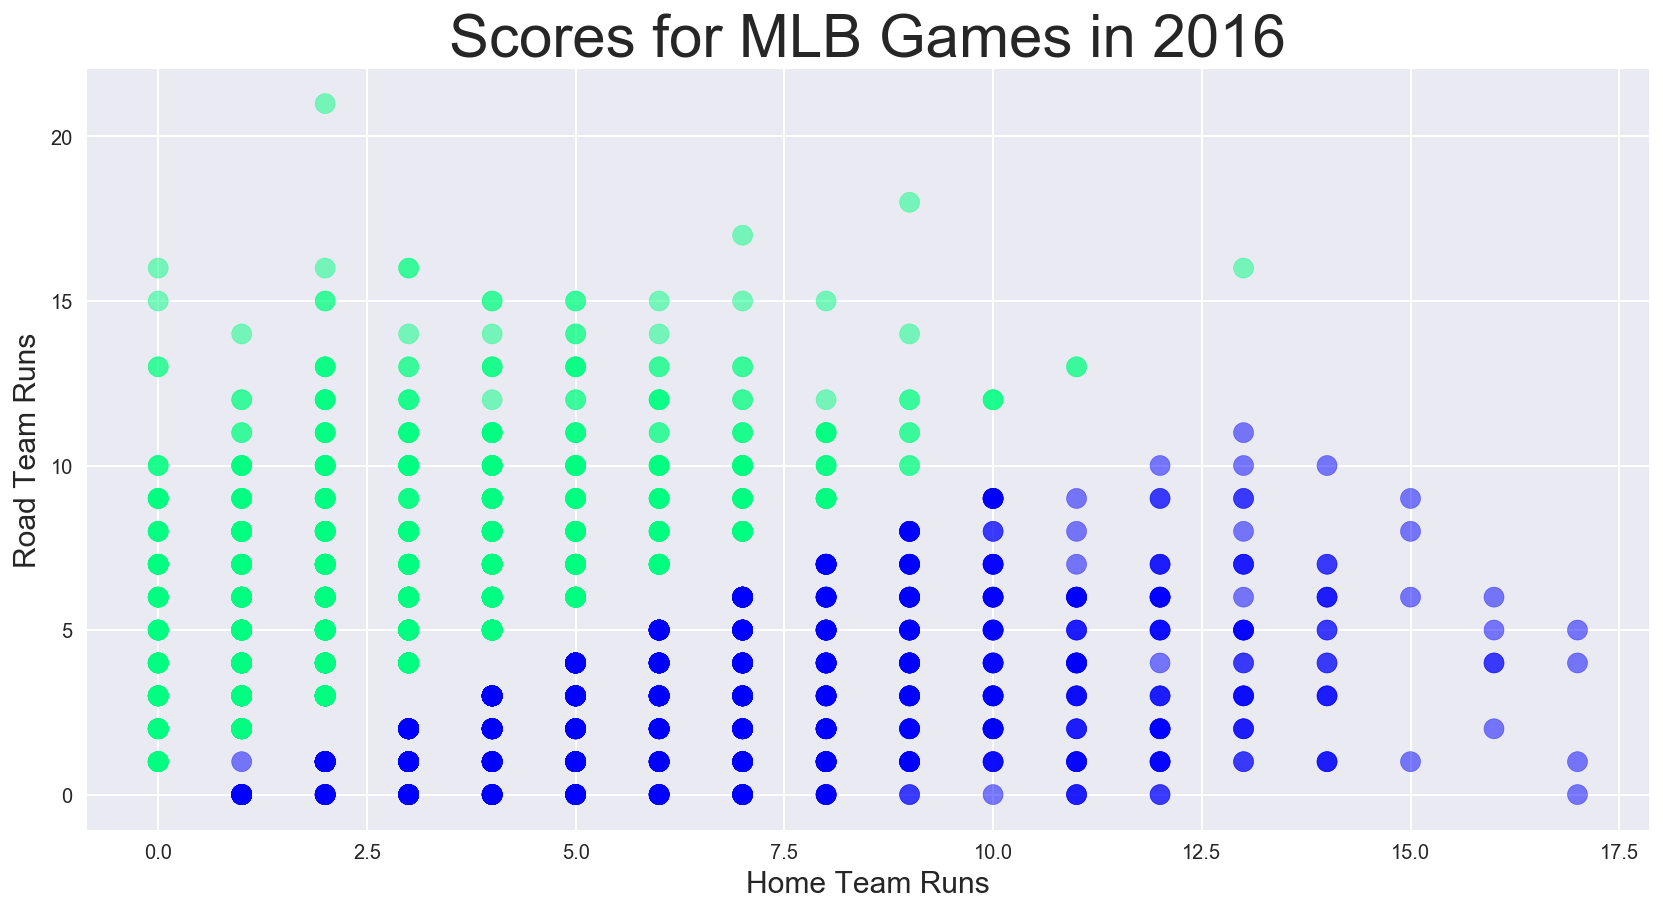

In [78]:
# Graph actual scores of MLB games in 2016
x=df.h_sc
y=df.v_sc
c=df.win_vis
fig = plt.figure(figsize=(14,7))
ax = fig.gca()
ax.scatter(x=x,y=y,s=100,c=c,cmap=plt.cm.winter,alpha=0.5)
ax.set_xlabel('Home Team Runs',fontsize=15)
ax.set_ylabel('Road Team Runs',fontsize=15)
ax.set_title('Scores for MLB Games in 2016', fontsize=30)
plt.show()

## 3. Create columns showing winning team, and if winner was home or visiting

I need to create a column that shows who won each game, and then create columns that can extract information about a team's last 'x' number of games or days. I want those variables to be somewhat flexible so that my models can test different combinations to look for any potential signal from the data.

In [53]:
# Create columns to show team initials of winner, and whether winner was home or visiting, since data about teams is
# separated that way. 

win_team=[]
win_horv=[]
for index, row in df.iterrows():
    if row['v_sc'] > row['h_sc']:
        win_team.append(row['vis'])
        win_horv.append('vis')
    else:
        win_team.append(row['home'])
        win_horv.append('home')

df['win_team'] = win_team
df['win_horv'] = win_horv

In [54]:
df.head(20)

,date,dh,day,vis,v_lg,v_g,home,h_lg,h_g,v_sc,h_sc,outs,d/n,park,att,len,v_sbi,h_sbi,v_ab,v_h,v_2b,v_3b,v_hr,v_rbi,v_sh,...,h_rbi,h_sh,h_sf,h_hbp,h_bb,h_ibb,h_k,h_sb,h_cs,h_hdp,h_ci,h_lob,h_pit,h_ier,h_er,h_wp,h_bk,h_po,h_a,h_e,h_pb,h_dp,h_tp,win_team,win_horv
0,2016-04-03,0,Sun,NYN,NL,1,KCA,AL,1,3,4,51,N,KAN06,40030,193,000000030,10010200x,33,7,1,0,0,3,0,...,4,0,1,0,2,0,3,1,0,3,0,5,5,3,3,0,0,27,13,0,0,0,0,KCA,home
1,2016-04-03,0,Sun,TOR,AL,1,TBA,AL,1,5,3,54,D,STP01,31042,171,200100020,001000002,35,7,1,0,1,5,0,...,3,0,0,0,1,0,7,0,1,0,0,6,4,4,4,1,0,27,8,1,0,0,0,TOR,vis
2,2016-04-03,0,Sun,SLN,NL,1,PIT,NL,1,1,4,51,D,PIT08,39500,182,000000001,02000101x,32,5,0,0,0,1,0,...,4,1,1,1,5,0,5,0,1,1,0,8,4,1,1,0,0,27,8,1,0,1,0,PIT,home
3,2016-04-04,0,Mon,CHN,NL,1,ANA,AL,1,9,0,54,N,ANA01,44020,188,100202103,000000000,37,11,3,0,1,9,0,...,0,0,0,0,1,0,7,0,0,0,0,3,5,9,9,0,0,27,8,1,0,1,0,CHN,vis
4,2016-04-04,0,Mon,MIN,AL,1,BAL,AL,1,2,3,53,D,BAL12,45785,168,000000200,000020001,33,7,3,0,0,2,0,...,3,0,0,0,5,0,10,1,0,0,0,12,6,2,2,0,0,27,6,0,0,0,0,BAL,home
5,2016-04-04,0,Mon,CHA,AL,1,OAK,AL,1,4,3,54,N,OAK01,35067,176,004000000,003000000,33,7,1,1,0,2,0,...,3,0,0,0,3,0,10,0,0,0,0,6,6,2,2,0,0,27,12,2,0,0,0,CHA,vis
6,2016-04-04,0,Mon,TOR,AL,2,TBA,AL,2,5,3,54,N,STP01,15116,178,001310000,010011000,33,7,1,0,3,5,0,...,2,0,0,0,4,0,9,1,0,0,0,9,4,5,5,1,0,27,6,0,0,0,0,TOR,vis
7,2016-04-04,0,Mon,SEA,AL,1,TEX,AL,1,2,3,51,D,ARL02,49289,158,110000000,00003000x,30,4,0,0,2,2,0,...,3,0,0,1,6,0,10,1,0,0,0,7,3,2,2,1,0,27,13,1,0,1,0,TEX,home
8,2016-04-04,0,Mon,COL,NL,1,ARI,NL,1,10,5,54,N,PHO01,48165,251,006100030,010220000,42,15,4,0,4,10,0,...,5,0,0,0,3,0,13,0,0,0,0,10,5,10,10,1,0,27,8,0,0,0,0,COL,vis
9,2016-04-04,0,Mon,WAS,NL,1,ATL,NL,1,4,3,60,D,ATL02,48282,203,1001000011,1001000100,37,8,1,0,2,4,0,...,3,0,0,1,5,0,11,0,0,1,0,5,6,3,3,1,0,30,11,2,0,1,0,WAS,vis


## 4. Create columns showing winning percentage for each team entering each game.

In [55]:
pd.value_counts(df.win_team[0:2])['TOR']

1

In [56]:
# Create columns that show record of each team before start of each game. First create lists..
v_w=[]
v_l=[]
h_w=[]
h_l=[]
for index, row in df.iterrows():
    try:
        viswin = pd.value_counts(df.win_team[0:index])[row['vis']]
        vislos = row['v_g'] - viswin - 1
    except:
        viswin=0
        vislos=row['v_g']-1
    try:
        homwin = pd.value_counts(df.win_team[0:index])[row['home']]
        homlos = row['h_g'] - homwin - 1
    except:
        homwin=0
        homlos=row['h_g']-1
    v_w.append(viswin)
    v_l.append(vislos)
    h_w.append(homwin)
    h_l.append(homlos)

In [57]:
# Assign lists to new columns in df
df['v_cumw']=v_w
df['v_cuml']=v_l
df['h_cumw']=h_w
df['h_cuml']=h_l

In [58]:
# Create columns for winning percentage
df['v_wpct']=df['v_cumw']/(df['v_cumw']+df['v_cuml'])
df['h_wpct']=df['h_cumw']/(df['h_cumw']+df['h_cuml'])

In [59]:
df.tail(7)

,date,dh,day,vis,v_lg,v_g,home,h_lg,h_g,v_sc,h_sc,outs,d/n,park,att,len,v_sbi,h_sbi,v_ab,v_h,v_2b,v_3b,v_hr,v_rbi,v_sh,...,h_k,h_sb,h_cs,h_hdp,h_ci,h_lob,h_pit,h_ier,h_er,h_wp,h_bk,h_po,h_a,h_e,h_pb,h_dp,h_tp,win_team,win_horv,v_cumw,v_cuml,h_cumw,h_cuml,v_wpct,h_wpct
2421,2016-10-02,0,Sun,DET,AL,161,ATL,NL,161,0,1,51,D,ATL02,51220,167,000000000,10000000x,31,5,1,0,0,0,0,...,10,1,0,1,0,5,3,0,0,0,0,27,6,0,0,1,0,ATL,home,86,74,67,93,0.537500,0.418750
2422,2016-10-02,0,Sun,CHN,NL,162,CIN,NL,162,7,4,54,D,CIN09,32587,198,001100014,300100000,35,9,2,0,2,7,0,...,7,0,0,0,0,5,6,7,7,0,0,27,10,0,0,1,0,CHN,vis,102,59,68,93,0.633540,0.422360
2423,2016-10-02,0,Sun,MIL,NL,162,COL,NL,162,6,4,60,D,DEN02,27762,203,0200000202,1100100010,39,10,4,1,2,6,0,...,11,0,1,0,0,12,5,6,6,0,0,30,13,0,0,0,0,MIL,vis,72,89,75,86,0.447205,0.465839
2424,2016-10-02,0,Sun,NYN,NL,162,PHI,NL,162,2,5,51,D,PHI13,36935,159,000001100,00100031x,33,8,3,0,0,2,0,...,3,0,0,2,0,7,5,2,2,0,0,27,7,0,0,1,0,PHI,home,87,74,70,91,0.540373,0.434783
2425,2016-10-02,0,Sun,LAN,NL,162,SFN,NL,162,1,7,51,D,SFO03,41445,184,000100000,23000002x,30,4,0,0,0,1,0,...,11,2,1,0,0,12,2,1,1,0,0,27,7,0,0,1,0,SFN,home,91,70,86,75,0.565217,0.534161
2426,2016-10-02,0,Sun,PIT,NL,162,SLN,NL,162,4,10,51,D,STL10,44615,192,000020200,00100360x,35,9,0,0,1,4,0,...,5,0,0,0,0,8,3,4,4,0,0,27,7,0,0,1,0,SLN,home,79,82,85,76,0.490683,0.527950
2427,2016-10-02,0,Sun,MIA,NL,161,WAS,NL,162,7,10,51,D,WAS11,28730,216,000230020,03023002x,38,14,1,1,2,7,1,...,3,2,0,1,0,7,6,7,7,1,0,27,11,0,0,1,0,WAS,home,79,81,94,67,0.493750,0.583851


## 5. Create code that can look back at a team's winning percentage over last x games.

In [60]:
x=10
v_w=[]
v_l=[]
h_w=[]
h_l=[]
for index, row in df.iterrows():
    viswin=0
    vislos=0
    homwin=0
    homlos=0
    if row['v_g']>x and row['h_g']>x:
        for index2, row2 in df.iterrows():
            if row2['vis'] == row['vis'] and row2['v_g'] == row['v_g']-x:
                viswin = row['v_cumw'] - row2['v_cumw']
                vislos = row['v_cuml'] - row2['v_cuml']
            elif row2['home'] == row['vis'] and row2['h_g'] == row['v_g']-x:
                viswin = row['v_cumw'] - row2['h_cumw']
                vislos = row['v_cuml'] - row2['h_cuml']
            else:
                pass
            if row2['vis'] == row['home'] and row2['v_g'] == row['h_g']-x:
                homwin = row['h_cumw'] - row2['v_cumw']
                homlos = row['h_cuml'] - row2['v_cuml']
            elif row2['home'] == row['home'] and row2['h_g'] == row['h_g']-x:
                homwin = row['h_cumw'] - row2['h_cumw']
                homlos = row['h_cuml'] - row2['h_cuml']
            else:
                pass
            if viswin + vislos > 0 and homwin + homlos > 0:
                break
            else:
                pass
    else:
        pass
    v_w.append(viswin)
    v_l.append(vislos)
    h_w.append(homwin)
    h_l.append(homlos)


In [61]:
df['v_testw']=v_w
df['v_testl']=v_l
df['h_testw']=h_w
df['h_testl']=h_l

In [62]:
# Create columns for winning percentage
df['v_testwpct']=df['v_testw']/(df['v_testw']+df['v_testl'])
df['h_testwpct']=df['h_testw']/(df['h_testw']+df['h_testl'])

In [63]:
df.tail(10)

,date,dh,day,vis,v_lg,v_g,home,h_lg,h_g,v_sc,h_sc,outs,d/n,park,att,len,v_sbi,h_sbi,v_ab,v_h,v_2b,v_3b,v_hr,v_rbi,v_sh,...,h_pit,h_ier,h_er,h_wp,h_bk,h_po,h_a,h_e,h_pb,h_dp,h_tp,win_team,win_horv,v_cumw,v_cuml,h_cumw,h_cuml,v_wpct,h_wpct,v_testw,v_testl,h_testw,h_testl,v_testwpct,h_testwpct
2418,2016-10-02,0,Sun,OAK,AL,162,SEA,AL,162,3,2,54,D,SEA03,24856,154,102000000,000020000,31,7,2,0,1,3,0,...,5,3,3,0,0,27,8,0,0,3,0,OAK,vis,68,93,86,75,0.422360,0.534161,2,8,7,3,0.2,0.7
2419,2016-10-02,0,Sun,TBA,AL,162,TEX,AL,162,6,4,60,D,ARL02,37015,240,0210001002,0101000110,42,13,6,0,0,5,0,...,7,5,5,4,0,30,15,2,0,1,0,TBA,vis,67,94,95,66,0.416149,0.590062,3,7,6,4,0.3,0.6
2420,2016-10-02,0,Sun,SDN,NL,162,ARI,NL,162,2,3,53,D,PHO01,31385,157,000100100,010000011,33,7,4,0,0,2,1,...,5,2,2,0,0,27,11,0,0,0,0,ARI,home,68,93,68,93,0.422360,0.422360,4,6,5,5,0.4,0.5
2421,2016-10-02,0,Sun,DET,AL,161,ATL,NL,161,0,1,51,D,ATL02,51220,167,000000000,10000000x,31,5,1,0,0,0,0,...,3,0,0,0,0,27,6,0,0,1,0,ATL,home,86,74,67,93,0.537500,0.418750,6,4,8,2,0.6,0.8
2422,2016-10-02,0,Sun,CHN,NL,162,CIN,NL,162,7,4,54,D,CIN09,32587,198,001100014,300100000,35,9,2,0,2,7,0,...,6,7,7,0,0,27,10,0,0,1,0,CHN,vis,102,59,68,93,0.633540,0.422360,6,4,5,5,0.6,0.5
2423,2016-10-02,0,Sun,MIL,NL,162,COL,NL,162,6,4,60,D,DEN02,27762,203,0200000202,1100100010,39,10,4,1,2,6,0,...,5,6,6,0,0,30,13,0,0,0,0,MIL,vis,72,89,75,86,0.447205,0.465839,4,6,3,7,0.4,0.3
2424,2016-10-02,0,Sun,NYN,NL,162,PHI,NL,162,2,5,51,D,PHI13,36935,159,000001100,00100031x,33,8,3,0,0,2,0,...,5,2,2,0,0,27,7,0,0,1,0,PHI,home,87,74,70,91,0.540373,0.434783,7,3,2,8,0.7,0.2
2425,2016-10-02,0,Sun,LAN,NL,162,SFN,NL,162,1,7,51,D,SFO03,41445,184,000100000,23000002x,30,4,0,0,0,1,0,...,2,1,1,0,0,27,7,0,0,1,0,SFN,home,91,70,86,75,0.565217,0.534161,6,4,6,4,0.6,0.6
2426,2016-10-02,0,Sun,PIT,NL,162,SLN,NL,162,4,10,51,D,STL10,44615,192,000020200,00100360x,35,9,0,0,1,4,0,...,3,4,4,0,0,27,7,0,0,1,0,SLN,home,79,82,85,76,0.490683,0.527950,3,7,5,5,0.3,0.5
2427,2016-10-02,0,Sun,MIA,NL,161,WAS,NL,162,7,10,51,D,WAS11,28730,216,000230020,03023002x,38,14,1,1,2,7,1,...,6,7,7,1,0,27,11,0,0,1,0,WAS,home,79,81,94,67,0.493750,0.583851,4,6,6,4,0.4,0.6


## 6. Create boolean mask that can subgroup x games of any team's stats.

In [64]:
# Initially, I will attempt to check for wins of each team over previous x games. Turns out this mask will work better
# for stats other than wins - thought of a different way to get wins.

x=10
current = 95
currentteam='WAS'


# This mask pulls games ATL involved in, games 1-10
df[((df.vis == currentteam) & (df.v_g>=current-x) & (df.v_g<current)) | 
  ((df.home == currentteam) & (df.h_g>=current-x) & (df.h_g<current))]

,date,dh,day,vis,v_lg,v_g,home,h_lg,h_g,v_sc,h_sc,outs,d/n,park,att,len,v_sbi,h_sbi,v_ab,v_h,v_2b,v_3b,v_hr,v_rbi,v_sh,...,h_pit,h_ier,h_er,h_wp,h_bk,h_po,h_a,h_e,h_pb,h_dp,h_tp,win_team,win_horv,v_cumw,v_cuml,h_cumw,h_cuml,v_wpct,h_wpct,v_testw,v_testl,h_testw,h_testl,v_testwpct,h_testwpct
1259,2016-07-05,0,Tue,MIL,NL,83,WAS,NL,85,5,2,54,N,WAS11,25138,172,001002200,010000100,34,10,3,0,2,5,1,...,3,4,4,0,0,27,14,1,1,3,0,MIL,vis,36,46,50,34,0.439024,0.595238,4,6,7,3,0.4,0.7
1274,2016-07-06,0,Wed,MIL,NL,84,WAS,NL,86,4,7,51,D,WAS11,26330,167,004000000,31102000x,34,8,1,0,0,3,0,...,4,4,4,0,0,27,7,1,0,2,0,WAS,home,37,46,50,35,0.445783,0.588235,4,6,7,3,0.4,0.7
1284,2016-07-07,0,Thu,WAS,NL,87,NYN,NL,85,7,9,51,N,NYC20,37569,219,100320100,00133110x,38,12,1,1,4,7,0,...,6,7,7,0,0,27,14,1,0,2,0,NYN,home,51,35,46,38,0.593023,0.547619,7,3,6,4,0.7,0.6
1298,2016-07-08,0,Fri,WAS,NL,88,NYN,NL,86,3,1,54,N,NYC20,35030,197,021000000,000010000,29,4,1,0,1,3,1,...,4,3,3,0,0,27,11,1,0,1,0,WAS,vis,51,36,47,38,0.586207,0.552941,6,4,7,3,0.6,0.7
1313,2016-07-09,0,Sat,WAS,NL,89,NYN,NL,87,6,1,54,N,NYC20,36953,193,012010200,100000000,33,7,2,1,1,6,0,...,3,6,6,0,1,27,12,0,0,0,0,WAS,vis,52,36,47,39,0.590909,0.546512,6,4,7,3,0.6,0.7
1328,2016-07-10,0,Sun,WAS,NL,90,NYN,NL,88,3,2,54,D,NYC20,35778,161,201000000,101000000,30,6,0,0,1,3,1,...,3,3,3,0,0,27,10,0,0,1,0,WAS,vis,53,36,47,40,0.595506,0.540230,6,4,7,3,0.6,0.7
1345,2016-07-15,0,Fri,PIT,NL,90,WAS,NL,91,1,5,51,N,WAS11,36982,163,000010000,00001040x,30,4,0,0,0,1,0,...,2,1,1,0,0,27,9,0,0,1,0,WAS,home,46,43,54,36,0.516854,0.600000,8,2,6,4,0.8,0.6
1360,2016-07-16,0,Sat,PIT,NL,91,WAS,NL,92,0,6,51,N,WAS11,38861,156,000000000,11031000x,31,6,0,0,0,0,0,...,2,0,0,0,0,27,12,0,0,2,0,WAS,home,46,44,55,36,0.511111,0.604396,7,3,6,4,0.7,0.6
1375,2016-07-17,0,Sun,PIT,NL,92,WAS,NL,93,2,1,108,D,WAS11,32775,348,000001000000000001,000000001000000000,62,12,6,0,1,2,1,...,8,2,2,1,0,54,19,0,0,1,0,PIT,vis,46,45,56,36,0.505495,0.608696,6,4,7,3,0.6,0.7
1400,2016-07-19,0,Tue,LAN,NL,95,WAS,NL,94,8,4,54,N,WAS11,38747,194,310020011,000010030,39,13,2,0,2,8,1,...,5,7,7,0,0,27,8,2,1,1,0,LAN,vis,52,42,56,37,0.553191,0.602151,5,5,6,4,0.5,0.6


In [65]:
# Create team dummy files for each time they won - keep this as separate db for now
team_dummies = pd.get_dummies(df.win_team)

In [66]:
# Create the target column for most models - whether the visiting team won (from dummy variables for win_horv)
horv_dummies = pd.get_dummies(df.win_horv,drop_first=True,prefix='win')

In [67]:
# Add win_vis column back to df
df = pd.concat([df, horv_dummies], axis=1)

In [68]:
df.columns

Index([u'date', u'dh', u'day', u'vis', u'v_lg', u'v_g', u'home', u'h_lg',
       u'h_g', u'v_sc', u'h_sc', u'outs', u'd/n', u'park', u'att', u'len',
       u'v_sbi', u'h_sbi', u'v_ab', u'v_h', u'v_2b', u'v_3b', u'v_hr',
       u'v_rbi', u'v_sh', u'v_sf', u'v_hbp', u'v_bb', u'v_ibb', u'v_k',
       u'v_sb', u'v_cs', u'v_hdp', u'v_ci', u'v_lob', u'v_pit', u'v_ier',
       u'v_er', u'v_wp', u'v_bk', u'v_po', u'v_a', u'v_e', u'v_pb', u'v_dp',
       u'v_tp', u'h_ab', u'h_h', u'h_2b', u'h_3b', u'h_hr', u'h_rbi', u'h_sh',
       u'h_sf', u'h_hbp', u'h_bb', u'h_ibb', u'h_k', u'h_sb', u'h_cs',
       u'h_hdp', u'h_ci', u'h_lob', u'h_pit', u'h_ier', u'h_er', u'h_wp',
       u'h_bk', u'h_po', u'h_a', u'h_e', u'h_pb', u'h_dp', u'h_tp',
       u'win_team', u'win_horv', u'v_cumw', u'v_cuml', u'h_cumw', u'h_cuml',
       u'v_wpct', u'h_wpct', u'v_testw', u'v_testl', u'h_testw', u'h_testl',
       u'v_testwpct', u'h_testwpct', u'win_vis'],
      dtype='object')

## 7. Write function to pull any statistic for last 'x' games for each team in all games.

In [9]:
# Write a function that takes a single statistic, pulls it for both teams previous x games, and returns results.

def stat_col_creator(stat,games):
    x=games
    vstat='v_'+stat
    hstat='h_'+stat
    v_stat=[]
    h_stat=[]
    for index, row in df.iterrows():
        game_v_stat=[]
        game_h_stat=[]
        if row['v_g']>x and row['h_g']>x:
            for index2, row2 in df.iterrows():
                if row2['vis'] == row['vis'] and row2['v_g'] >= row['v_g']-x and row2['v_g'] < row['v_g']:
                    game_v_stat.append(row2[vstat])
                elif row2['home'] == row['vis'] and row2['h_g'] >= row['v_g']-x and row2['h_g'] < row['v_g']:
                    game_v_stat.append(row2[hstat])
                else:
                    pass
                if row2['home'] == row['home'] and row2['h_g'] >= row['h_g']-x and row2['h_g'] < row['h_g']:
                    game_h_stat.append(row2[hstat])
                elif row2['vis'] == row['home'] and row2['v_g'] >= row['h_g']-x and row2['v_g'] < row['h_g']:
                    game_h_stat.append(row2[vstat])
                else:
                    pass
                if len(game_v_stat)==x and len(game_h_stat)==x:
                    break
                else:
                    pass
        else:
            pass
        try: 
            v_stat.append(np.mean(game_v_stat))
        except:
            v_stat.append(None)
        try:
            h_stat.append(np.mean(game_h_stat))
        except:
            h_stat.append(None)
    vstat=vstat+'_'+str(games)
    hstat=hstat+'_'+str(games)
    return v_stat, h_stat, vstat, hstat

In [70]:
# Build loop to pull stats (this took an incredibly long time - 6 hours!)
for statloop in ['sc','h','hr','lob','pit','er','po','e']:
    for daysloop in [3,5,8,13,21,34]:
        v_stat, h_stat, vstat, hstat = stat_col_creator(statloop,daysloop)
        df[vstat+'_avg'] = v_stat
        df[hstat+'_avg'] = h_stat
        df['vh_'+vstat[2:]+'_diff'] = df[vstat+'_avg'] - df[hstat+'_avg']
        print statloop,daysloop

/Users/jonvanwieren/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/jonvanwieren/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


sc 3
sc 5
sc 8
sc 13
sc 21
sc 34
h 3
h 5
h 8
h 13
h 21
h 34
hr 3
hr 5
hr 8
hr 13
hr 21
hr 34
lob 3
lob 5
lob 8
lob 13
lob 21
lob 34
pit 3
pit 5
pit 8
pit 13
pit 21
pit 34
er 3
er 5
er 8
er 13
er 21
er 34
po 3
po 5
po 8
po 13
po 21
po 34
e 3
e 5
e 8
e 13
e 21
e 34


In [88]:
df.columns

Index([u'date', u'dh', u'day', u'vis', u'v_lg', u'v_g', u'home', u'h_lg',
       u'h_g', u'v_sc',
       ...
       u'vh_e_8_diff', u'v_e_13_avg', u'h_e_13_avg', u'vh_e_13_diff',
       u'v_e_21_avg', u'h_e_21_avg', u'vh_e_21_diff', u'v_e_34_avg',
       u'h_e_34_avg', u'vh_e_34_diff'],
      dtype='object', length=233)

In [90]:
# Save data in csv file 
df.to_csv('./df_csv.csv', index=False, encoding='utf-8')

In [2]:
# Load data from csv file
df = pd.read_csv('df_csv.csv')

In [114]:
df.win_vis.value_counts()


0    1288
1    1140
Name: win_vis, dtype: int64

In [116]:
# Establish baseline: 
1140./(1288+1140)

0.4695222405271829

## 8. Models


0.0573802004795


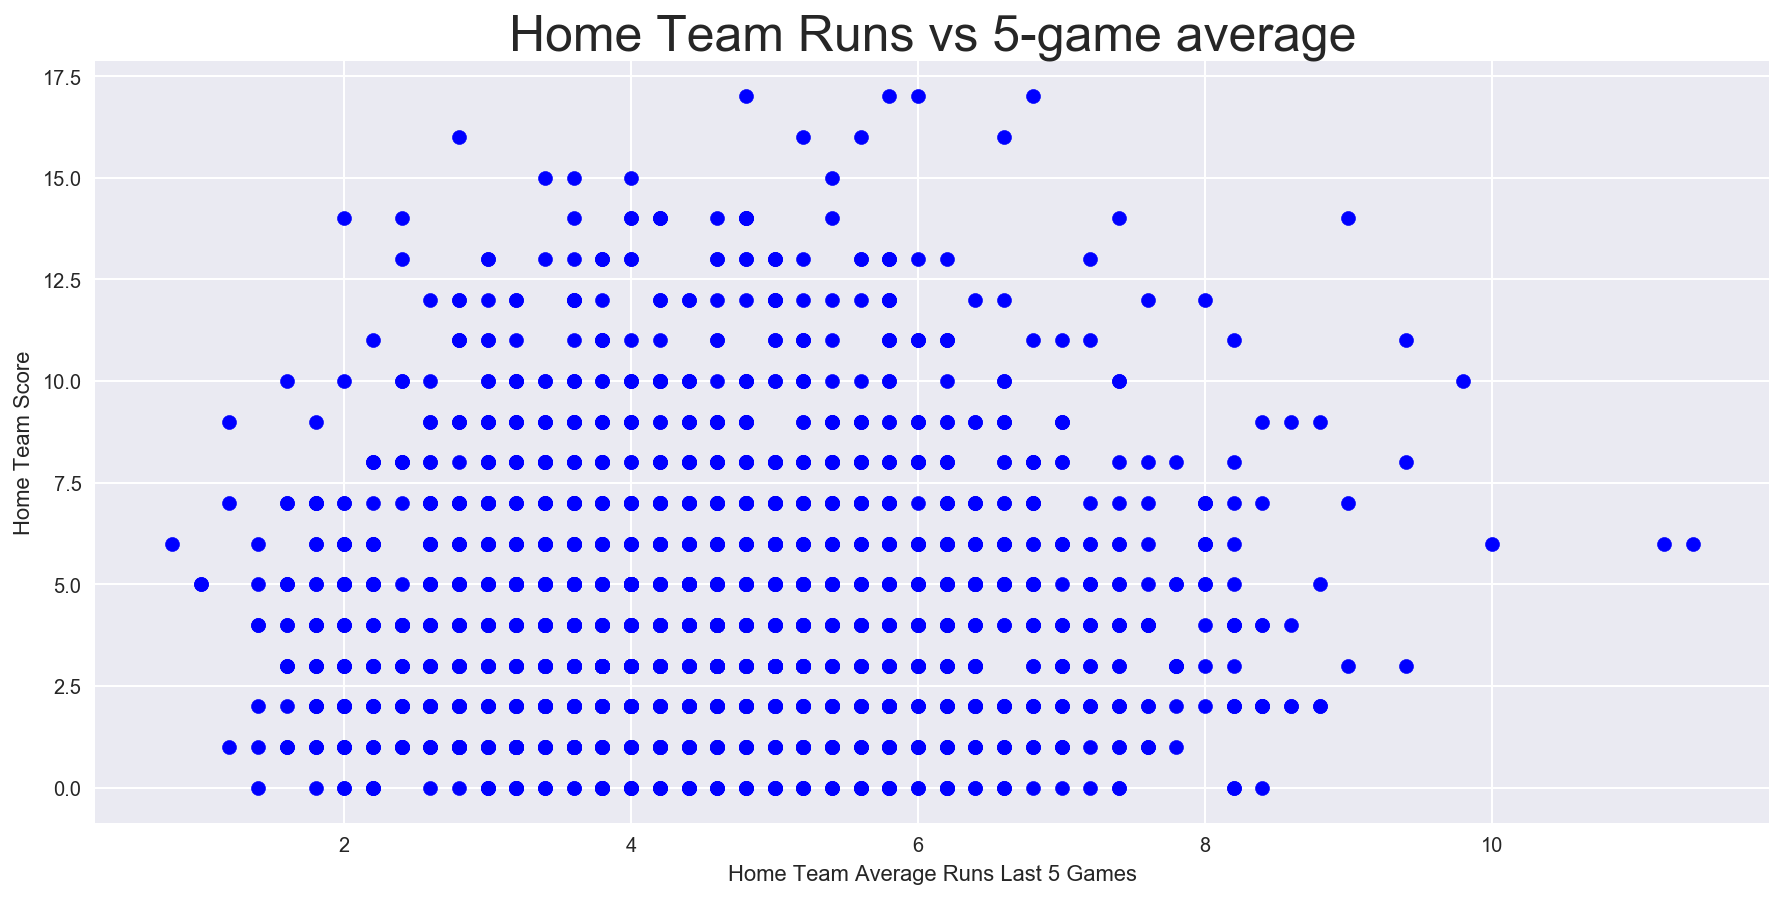

In [6]:
# Was going to try to run linear regression on runs in last x games vs runs, but almost no correlation.
df_model=df.copy()
allcol=['h_sc_5_avg','v_sc_5_avg','v_sc','h_sc','win_vis']
df_model=df_model[allcol]
df_model.dropna(inplace=True)
fig=plt.figure(figsize=(15,7))
ax=plt.gca()
x1=df_model.h_sc_5_avg
y=df_model.h_sc
ax.scatter(x1,y,c='b')
ax.set(xlabel='Home Team Average Runs Last 5 Games', ylabel= 'Home Team Score')
plt.title('Home Team Runs vs 5-game average',fontsize=25)
print np.corrcoef(x1,y)[0,1]

0.0270021808052


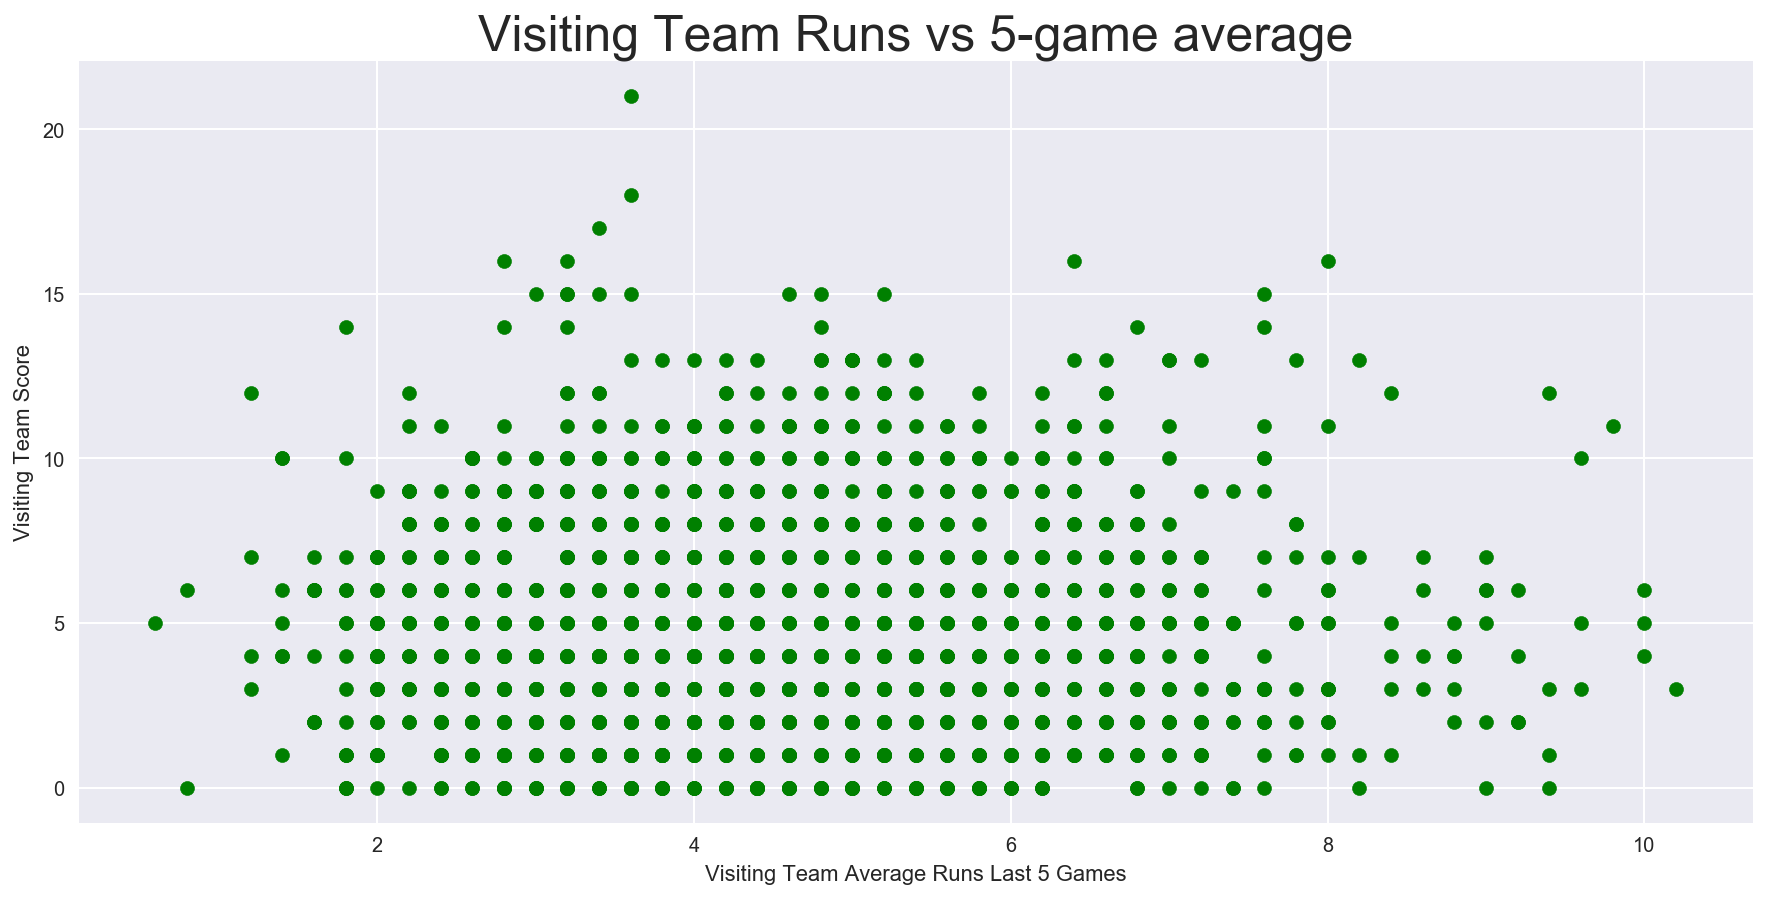

In [7]:
df_model=df.copy()
allcol=['h_sc_5_avg','v_sc_5_avg','v_sc','h_sc','win_vis']
df_model=df_model[allcol]
df_model.dropna(inplace=True)
fig=plt.figure(figsize=(15,7))
ax=plt.gca()
x1=df_model.v_sc_5_avg
y=df_model.v_sc
ax.scatter(x1,y,c='g')
ax.set(xlabel='Visiting Team Average Runs Last 5 Games', ylabel= 'Visiting Team Score')
plt.title('Visiting Team Runs vs 5-game average',fontsize=25)
print np.corrcoef(x1,y)[0,1]

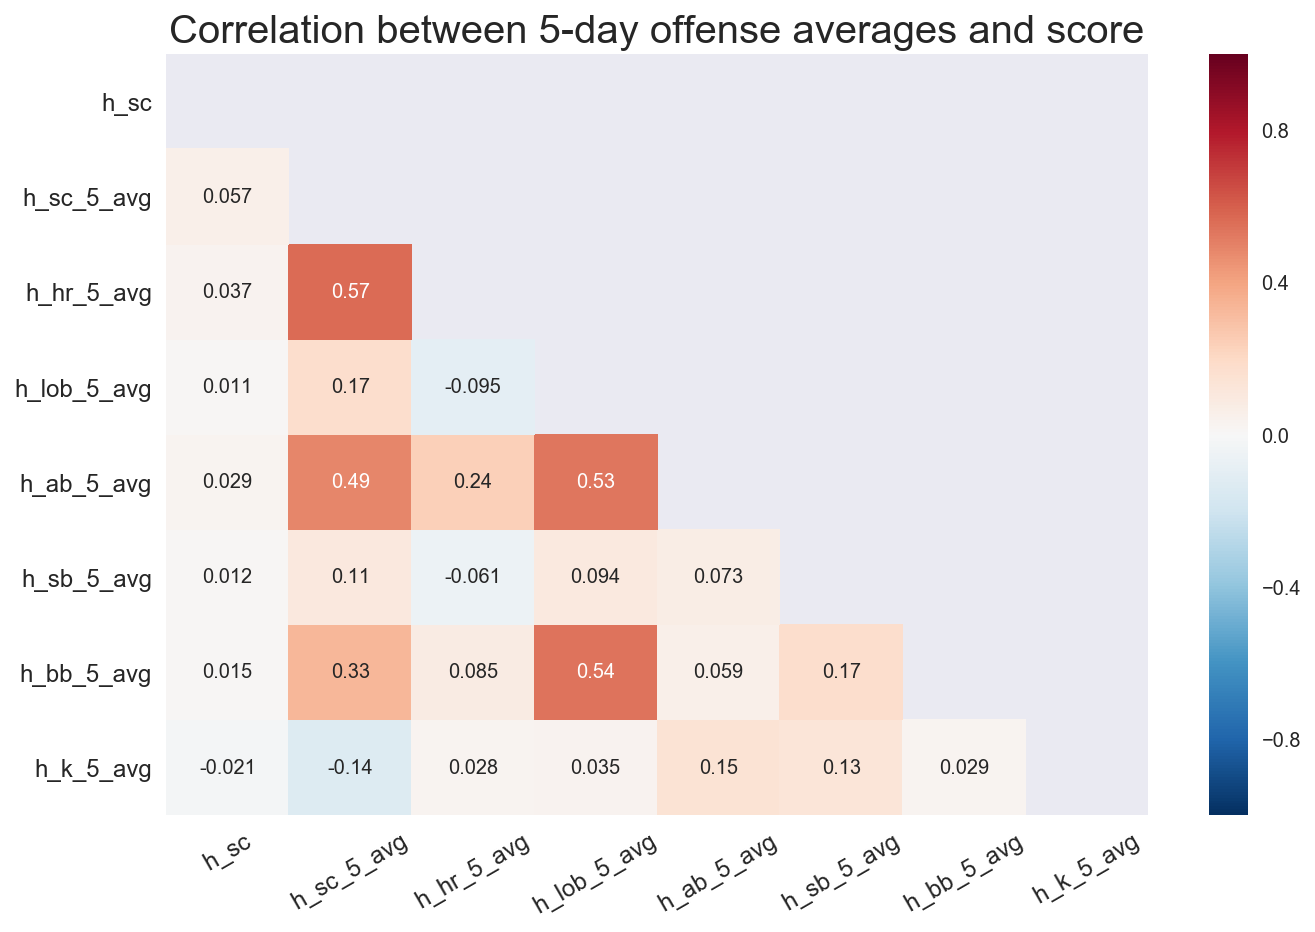

In [4]:
#Running heat map on fixed numerical values
def correlation_heat_map(df):
    corrs = df.corr()
    fig, ax = plt.subplots(figsize=(11,7))
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    ax = sns.heatmap(corrs, mask=mask, annot=True)
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=12, rotation=0)
    ax.set_title('Correlation between 5-day offense averages and score',fontsize=20)
    plt.show()

df_graph = df.copy()
allcol = ['h_sc','h_sc_5_avg','h_hr_5_avg','h_lob_5_avg','h_ab_5_avg','h_sb_5_avg','h_bb_5_avg','h_k_5_avg']  
df_graph = df_graph[allcol]              

correlation_heat_map(df_graph)

In [315]:
# MODEL #1 LOGISTIC REGRESSION ON CUMULATIVE RECORD (BET ON BETTER TEAM)
allcol = ['v_sc','h_sc','win_vis','vh_wpct_diff']
df_model=df[allcol]
df_model.dropna(inplace=True)       
y = df_model.win_vis.values
X = df_model['vh_wpct_diff'].values.reshape(-1,1)
Xs=StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xs,y, train_size=.8)
lr = LogisticRegression()
lr.fit(X_train,y_train)
scores = cross_val_score(lr,X_train,y_train,cv=10)
print "Model: Logistic Regression"
print "Comparing Winners to Better Cumulative Winning Percentage"
print "Cross-Validated Model Accuracy: "+str(scores.mean())+" (+/- "+str(scores.std())+")"
predicted=lr.predict(X_test)
accscore=lr.score(X_test,y_test)
print "Test Data Accuracy: "+str(accscore)
print confusion_matrix(y_test, predicted)

Model: Logistic Regression
Comparing Winners to Better Cumulative Winning Percentage
Cross-Validated Model Accuracy: 0.548662459048 (+/- 0.0231567359384)
Test Data Accuracy: 0.530020703934
[[222  34]
 [193  34]]


/Users/jonvanwieren/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [59]:
predicted.shape

(1910,)

In [64]:
df_model.h_sc.shape

(1910,)

In [4]:
# MODEL #2: LOGISTIC REGRESSION (StandardScaler to scale data, train/test 80/20 split, cross val over training data)

from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

for daysloop in [3,5,8,13,21,34]:
    columns=[]
    colstats=[]
    cols=[]
    allcol=[]
    df_model=df.copy()
    colstats=['sc','h','hr','lob','pit','er','po','e']
    cols = ['vh_'+c+'_'+str(daysloop)+'_diff' for c in colstats]
    allcol = cols + ['win_vis','v_sc','h_sc']
    df_model=df_model[allcol]
    df_model.dropna(inplace=True) 
    y = df_model.win_vis.values
    X = df_model[cols]
    Xs=StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(Xs,y, train_size=.8)
    lr = LogisticRegression()
    lr.fit(X_train,y_train)
    scores = cross_val_score(lr,X_train,y_train,cv=10)
    print "Model: Logistic Regression"
    print "Period: "+str(daysloop)+" days"
    print "Cross-Validated Model Accuracy: "+str(scores.mean())+" (+/- "+str(scores.std())+")"
    predicted=lr.predict(X_test)
    accscore=lr.score(X_test,y_test)
    print "Test Data Accuracy: "+str(accscore)
    print confusion_matrix(y_test, predicted)
    print "--------------------------------------------------------------------"

/Users/jonvanwieren/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Model: Logistic Regression
Period: 3 days
Cross-Validated Model Accuracy: 0.533896885903 (+/- 0.0228732067541)
Test Data Accuracy: 0.539915966387
[[211  37]
 [182  46]]
--------------------------------------------------------------------
Model: Logistic Regression
Period: 5 days
Cross-Validated Model Accuracy: 0.533636080695 (+/- 0.0308958238515)
Test Data Accuracy: 0.531914893617
[[193  45]
 [175  57]]
--------------------------------------------------------------------
Model: Logistic Regression
Period: 8 days
Cross-Validated Model Accuracy: 0.520884141447 (+/- 0.0379165988628)
Test Data Accuracy: 0.529284164859
[[182  71]
 [146  62]]
--------------------------------------------------------------------
Model: Logistic Regression
Period: 13 days
Cross-Validated Model Accuracy: 0.526662155688 (+/- 0.0262168216441)
Test Data Accuracy: 0.529147982063
[[192  50]
 [160  44]]
--------------------------------------------------------------------
Model: Logistic Regression
Period: 21 days
Cros

In [244]:
X_test[:][0]

array([-0.47443621, -0.54299999,  1.40001286, -1.10027931, -0.05166701,
        1.31175398,  0.10998937,  0.3667822 ])

Model: Logistic Regression
Period: 34 days
Cross-Validated Model Accuracy: 0.585862785863 (+/- 0.0485201454693)
Test Data Accuracy: 0.61780104712
[[158  42]
 [144  38]]
--------------------------------------------------------------------


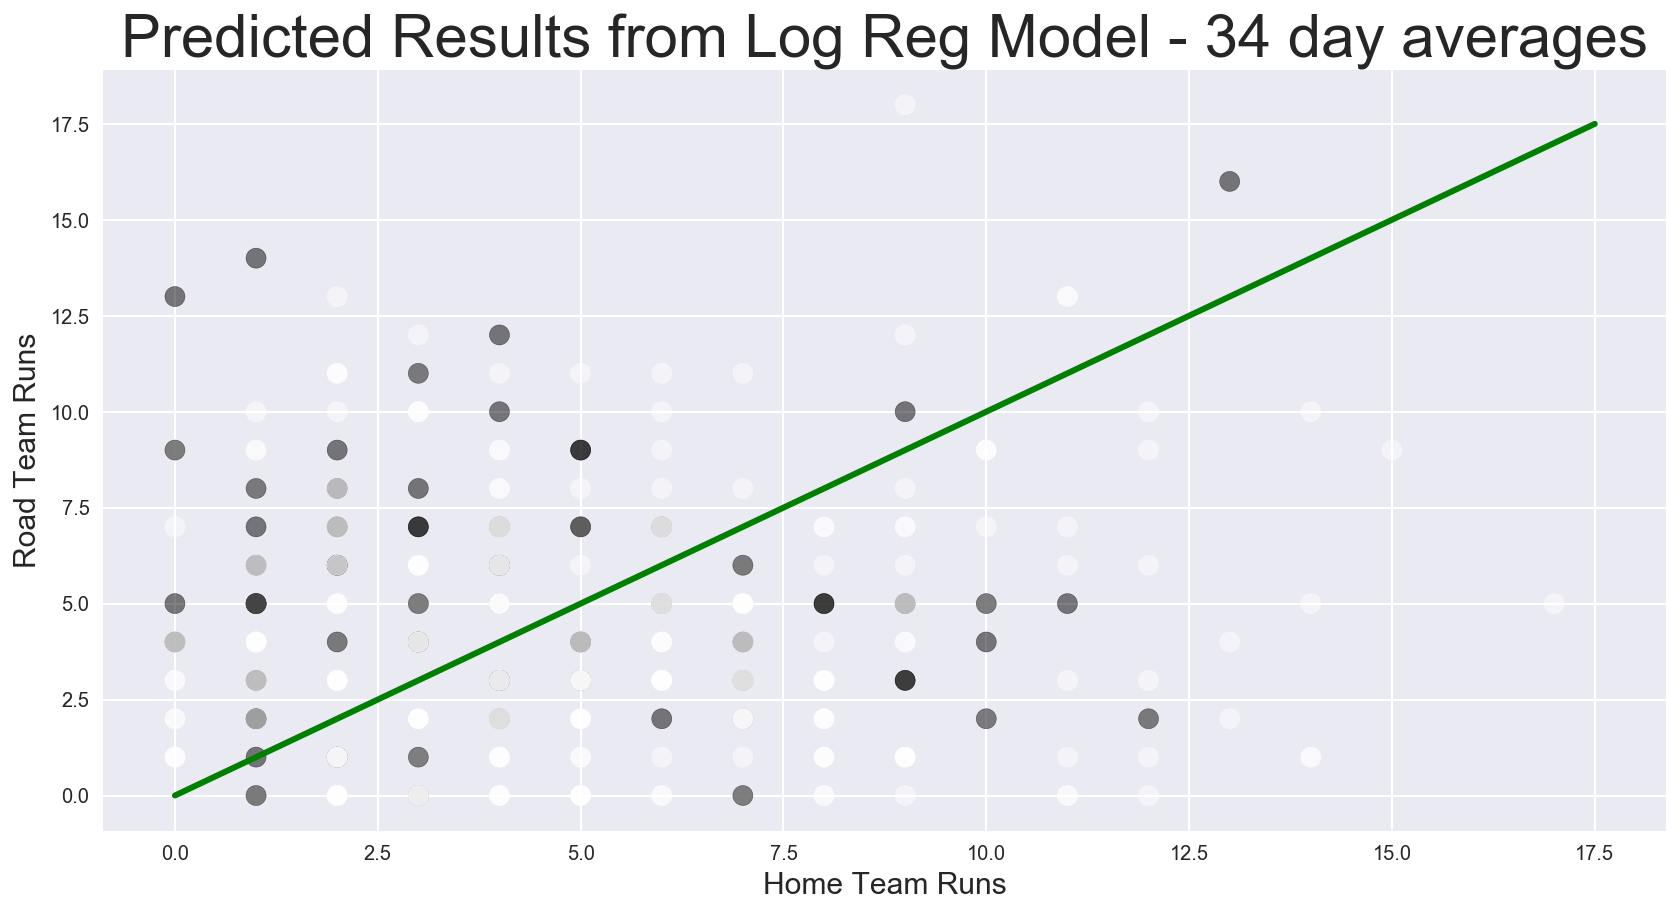

In [5]:
# Create sample database for graphical representation of results:
columns=[]
colstats=[]
cols=[]
allcol=[]
df_model=df.copy()
colstats=['sc','h','hr','lob','pit','er','po','e']
cols = ['vh_'+c+'_'+str(34)+'_diff' for c in colstats]
allcol = cols + ['win_vis','v_sc','h_sc']
df_model=df_model[allcol]
df_model.dropna(inplace=True) 
df_sample=df_model.sample(n=382)
y = df_sample.win_vis.values
X = df_sample[cols]
Xs=StandardScaler().fit_transform(X)
lr = LogisticRegression()
lr.fit(Xs,y)
scores = cross_val_score(lr,Xs,y,cv=10)
print "Model: Logistic Regression"
print "Period: "+str(daysloop)+" days"
print "Cross-Validated Model Accuracy: "+str(scores.mean())+" (+/- "+str(scores.std())+")"
predicted=lr.predict(Xs)
accscore=lr.score(Xs,y)
print "Test Data Accuracy: "+str(accscore)
print confusion_matrix(y_test, predicted)
print "--------------------------------------------------------------------"

df_sample['predicted']=list(predicted)
x=df_sample.h_sc
y=df_sample.v_sc
c=df_sample.predicted
fig = plt.figure(figsize=(14,7))
ax = fig.gca()
ax.scatter(x=x,y=y,s=100,c=c,cmap=plt.cm.binary,alpha=0.5)
plt.plot([0,17.5],[0,17.5], 'g-', lw=3)
ax.set_xlabel('Home Team Runs',fontsize=15)
ax.set_ylabel('Road Team Runs',fontsize=15)
ax.set_title('Predicted Results from Log Reg Model - 34 day averages', fontsize=30)
plt.show()

In [4]:
# Calculate winning percentages over various periods for each team
for x in [3,5,8,13,21,34]:   
    v_w=[]
    v_l=[]
    h_w=[]
    h_l=[]
    for index, row in df.iterrows():
        viswin=0
        vislos=0
        homwin=0
        homlos=0
        if row['v_g']>x and row['h_g']>x:
            for index2, row2 in df.iterrows():
                if row2['vis'] == row['vis'] and row2['v_g'] == row['v_g']-x:
                    viswin = row['v_cumw'] - row2['v_cumw']
                    vislos = row['v_cuml'] - row2['v_cuml']
                elif row2['home'] == row['vis'] and row2['h_g'] == row['v_g']-x:
                    viswin = row['v_cumw'] - row2['h_cumw']
                    vislos = row['v_cuml'] - row2['h_cuml']
                else:
                    pass
                if row2['vis'] == row['home'] and row2['v_g'] == row['h_g']-x:
                    homwin = row['h_cumw'] - row2['v_cumw']
                    homlos = row['h_cuml'] - row2['v_cuml']
                elif row2['home'] == row['home'] and row2['h_g'] == row['h_g']-x:
                    homwin = row['h_cumw'] - row2['h_cumw']
                    homlos = row['h_cuml'] - row2['h_cuml']
                else:
                    pass
                if viswin + vislos > 0 and homwin + homlos > 0:
                    break
                else:
                    pass
        else:
            pass
        v_w.append(viswin)
        v_l.append(vislos)
        h_w.append(homwin)
        h_l.append(homlos)
    df['v_w_'+str(x)]=v_w
    df['v_l_'+str(x)]=v_l
    df['h_w_'+str(x)]=h_w
    df['h_l_'+str(x)]=h_l
    df['v_wpct_'+str(x)]=df['v_w_'+str(x)]/(df['v_w_'+str(x)]+df['v_l_'+str(x)])
    df['h_wpct_'+str(x)]=df['h_w_'+str(x)]/(df['h_w_'+str(x)]+df['h_l_'+str(x)])
    print "Completed for "+str(x)

Completed for 3
Completed for 5
Completed for 8
Completed for 13
Completed for 21
Completed for 34


In [7]:
for x in [3,5,8,13,21,34]:
    df['vh_wpct_'+str(x)+'_diff'] = df['v_wpct_'+str(x)] - df['h_wpct_'+str(x)]


In [23]:
# Save data in csv file 
df.to_csv('./df_csv.csv', index=False, encoding='utf-8')

In [6]:
# Load data from csv file
df = pd.read_csv('df_csv.csv')

/Users/jonvanwieren/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
# MODEL #3: LOGISTIC REGRESSION (Same as 1 but add winning pct over each game range, and testing with 2 date ranges)

from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

d_dl1=[]
d_dl2=[]
d_sm=[]
d_ss=[]
d_as=[]
d_cm1=[]
d_cm2=[]
d_cm3=[]
d_cm4=[]
for daysloop1 in [3,5,8,13,21,34]:
    for daysloop2 in [3,5,8,13,21,34]:
        if daysloop1 < daysloop2:
            d_dl1.append(daysloop1)
            d_dl2.append(daysloop2)
            columns=[]
            colstats=[]
            cols1=[]
            cols2=[]
            allcol=[]
            df_model=df.copy()
            colstats=['sc','h','hr','lob','pit','er','po','e','wpct']
            cols1 = ['vh_'+c+'_'+str(daysloop)+'_diff' for c in colstats]
            cols2 = ['vh_'+c+'_'+str(daysloop)+'_diff' for c in colstats]
            cols = cols1 + cols2
            allcol = cols + ['win_vis']
            df_model=df_model[allcol]
            df_model.dropna(inplace=True)       
            y = df_model.win_vis.values
            X = df_model[cols]
            Xs=StandardScaler().fit_transform(X)
            X_train, X_test, y_train, y_test = train_test_split(Xs,y, train_size=.8)
            lr = LogisticRegression()
            lr.fit(X_train,y_train)
            scores = cross_val_score(lr,X_train,y_train,cv=10)
            score_mean = scores.mean()
            score_std = scores.std()
            print "Model: Logistic Regression"
            print "Period: "+str(daysloop1)+" and "+str(daysloop2)+" days"
            print "Cross-Validated Model Accuracy: "+str(score_mean)+" (+/- "+str(score_std)+")"
            predicted=lr.predict(X_test)
            accscore=lr.score(X_test,y_test)
            print "Test Data Accuracy: "+str(accscore)
            print confusion_matrix(y_test, predicted)
            print "--------------------------------------------------------------------"
            d_sm.append(score_mean)
            d_ss.append(score_std)
            d_as.append(accscore)
            d_cm1.append(confusion_matrix(y_test, predicted)[0][0])
            d_cm2.append(confusion_matrix(y_test, predicted)[0][1])
            d_cm3.append(confusion_matrix(y_test, predicted)[1][0])
            d_cm4.append(confusion_matrix(y_test, predicted)[1][1])  
        else:
            pass

Model: Logistic Regression
Period: 3 and 5 days
Cross-Validated Model Accuracy: 0.535996240602 (+/- 0.0303513372282)
Test Data Accuracy: 0.528795811518
[[160  37]
 [143  42]]
--------------------------------------------------------------------
Model: Logistic Regression
Period: 3 and 8 days
Cross-Validated Model Accuracy: 0.541860364455 (+/- 0.0294214261513)
Test Data Accuracy: 0.528795811518
[[147  65]
 [115  55]]
--------------------------------------------------------------------
Model: Logistic Regression
Period: 3 and 13 days
Cross-Validated Model Accuracy: 0.530792332882 (+/- 0.0328293527346)
Test Data Accuracy: 0.586387434555
[[175  41]
 [117  49]]
--------------------------------------------------------------------
Model: Logistic Regression
Period: 3 and 21 days
Cross-Validated Model Accuracy: 0.532800416817 (+/- 0.0263890181317)
Test Data Accuracy: 0.568062827225
[[177  29]
 [136  40]]
--------------------------------------------------------------------
Model: Logistic Regres

In [7]:
db_results=pd.DataFrame(columns=['Days1','Days2','CV Acc','CV Acc Std','Test Acc','HW,HP','hw,vp','vw,hp','VW,VP'])
db_results['Days1']=d_dl1
db_results['Days2']=d_dl2
db_results['CV Acc']=d_sm
db_results['CV Acc Std']=d_ss
db_results['Test Acc']=d_as
db_results['HW,HP']=d_cm1
db_results['hw,vp']=d_cm2
db_results['vw,hp']=d_cm3
db_results['VW,VP']=d_cm4

In [8]:
db_results

,Days1,Days2,CV Acc,CV Acc Std,Test Acc,"HW,HP","hw,vp","vw,hp","VW,VP"
0,3,5,0.535996,0.030351,0.528796,160,37,143,42
1,3,8,0.541860,0.029421,0.528796,147,65,115,55
2,3,13,0.530792,0.032829,0.586387,175,41,117,49
3,3,21,0.532800,0.026389,0.568063,177,29,136,40
4,3,34,0.547027,0.030866,0.547120,155,52,121,54
5,5,8,0.543877,0.022268,0.544503,168,35,139,40
6,5,13,0.548944,0.046530,0.507853,151,55,133,43
7,5,21,0.538046,0.030101,0.536649,150,65,112,55
8,5,34,0.546487,0.027343,0.528796,164,38,142,38
9,8,13,0.541772,0.037038,0.502618,161,36,154,31


Model: Logistic Regression
Periods: 13 days and 34 days
Cross-Validated Model Accuracy: 0.555232155232 (+/- 0.0422091470355)
Test Data Accuracy: 0.609947643979
[[136  71]
 [113  62]]
--------------------------------------------------------------------


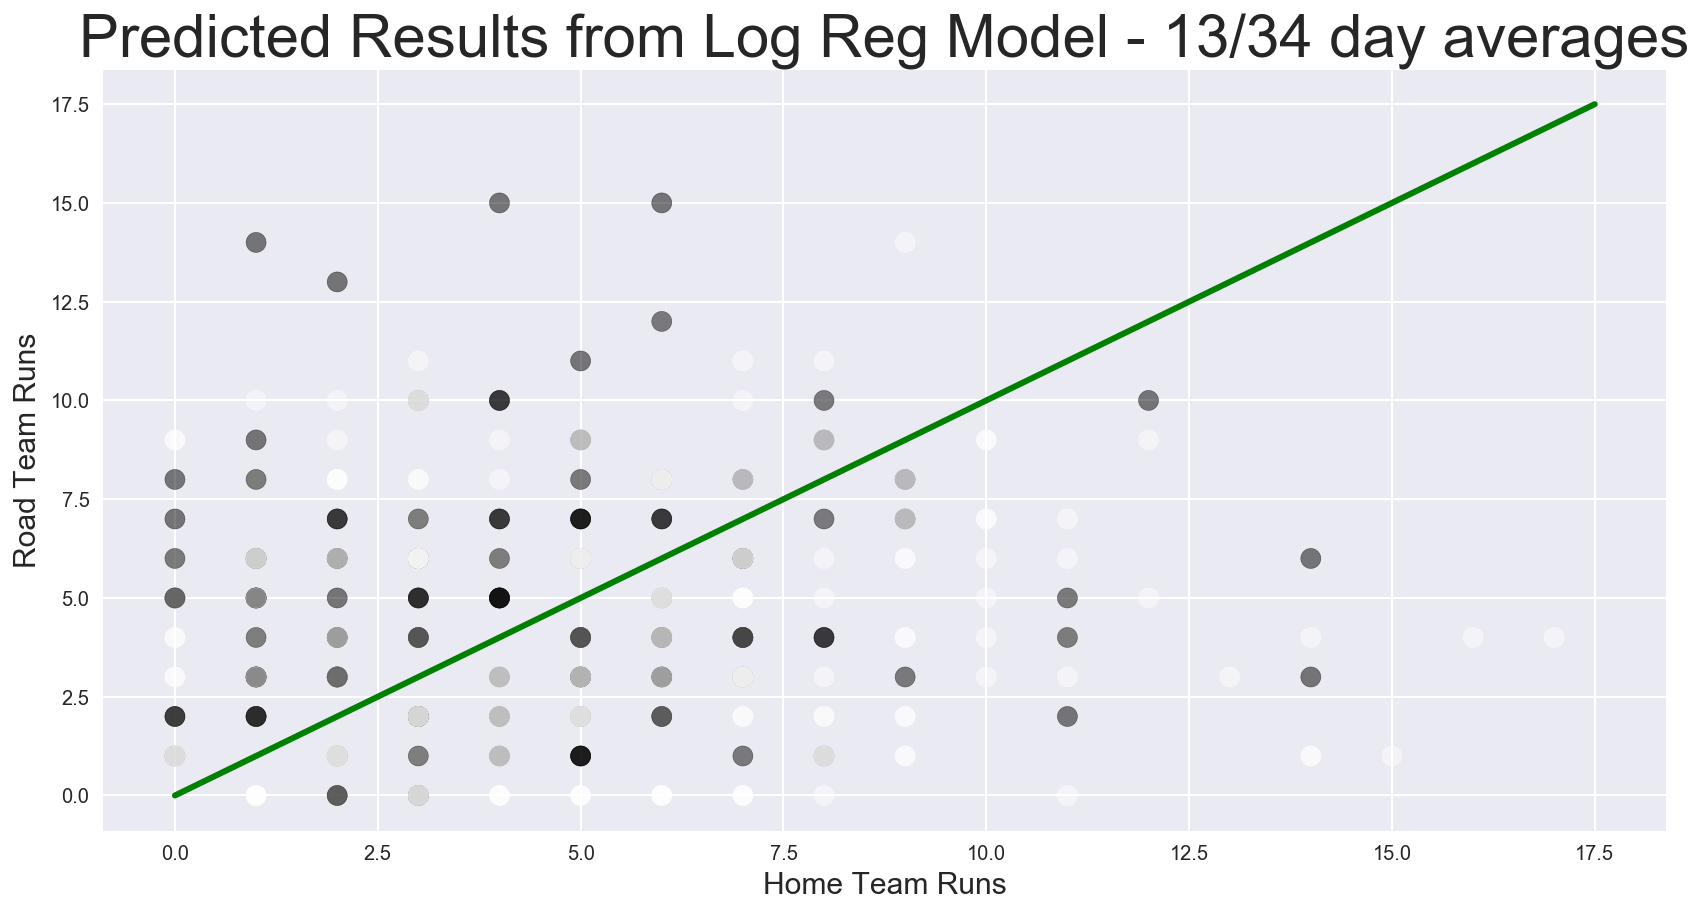

In [10]:
# Create sample database for graphical representation of results:
columns=[]
colstats=[]
cols=[]
allcol=[]
df_model=df.copy()
colstats=['sc','h','hr','lob','pit','er','po','e','wpct']
cols1 = ['vh_'+c+'_'+str(13)+'_diff' for c in colstats]
cols2 = ['vh_'+c+'_'+str(34)+'_diff' for c in colstats]
cols = cols1 + cols2
allcol = cols + ['win_vis','h_sc','v_sc']
df_model=df_model[allcol]
df_model.dropna(inplace=True) 
df_sample=df_model.sample(n=382)
y = df_sample.win_vis.values
X = df_sample[cols]
Xs=StandardScaler().fit_transform(X)
lr = LogisticRegression()
lr.fit(Xs,y)
scores = cross_val_score(lr,Xs,y,cv=10)
print "Model: Logistic Regression"
print "Periods: 13 days and 34 days"
print "Cross-Validated Model Accuracy: "+str(scores.mean())+" (+/- "+str(scores.std())+")"
predicted=lr.predict(Xs)
accscore=lr.score(Xs,y)
print "Test Data Accuracy: "+str(accscore)
print confusion_matrix(y_test, predicted)
print "--------------------------------------------------------------------"

df_sample['predicted']=list(predicted)
x=df_sample.h_sc
y=df_sample.v_sc
c=df_sample.predicted
fig = plt.figure(figsize=(14,7))
ax = fig.gca()
ax.scatter(x=x,y=y,s=100,c=c,cmap=plt.cm.binary,alpha=0.5)
plt.plot([0,17.5],[0,17.5], 'g-', lw=3)
ax.set_xlabel('Home Team Runs',fontsize=15)
ax.set_ylabel('Road Team Runs',fontsize=15)
ax.set_title('Predicted Results from Log Reg Model - 13/34 day averages', fontsize=30)
plt.show()

## 9. Create more data columns for models - try to find stronger signal.


In [10]:
# Create more potential predictors
for statloop in ['ab','sb','bb','k','pit','ier','dp']:
    for daysloop in [3,5,8,13,21,34]:
        v_stat, h_stat, vstat, hstat = stat_col_creator(statloop,daysloop)
        df[vstat+'_avg'] = v_stat
        df[hstat+'_avg'] = h_stat
        df['vh_'+vstat[2:]+'_diff'] = df[vstat+'_avg'] - df[hstat+'_avg']
        print statloop,daysloop

/Users/jonvanwieren/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/jonvanwieren/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ab 3
ab 5
ab 8
ab 13
ab 21
ab 34
sb 3
sb 5
sb 8
sb 13
sb 21
sb 34
bb 3
bb 5
bb 8
bb 13
bb 21
bb 34
k 3
k 5
k 8
k 13
k 21
k 34
pit 3
pit 5
pit 8
pit 13
pit 21
pit 34
ier 3
ier 5
ier 8
ier 13
ier 21
ier 34
dp 3
dp 5
dp 8
dp 13
dp 21
dp 34


## 10. Run more models with the new expanded data.

In [11]:
# MODEL #4: LOGISTIC REGRESSION (added in new data points from last night's all-night calculations)

from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

for daysloop in [3,5,8,13,21,34]:
    columns=[]
    colstats=[]
    cols=[]
    allcol=[]
    df_model=df.copy()
    colstats=['sc','h','hr','lob','pit','er','po','e','ab','sb','bb','k','pit','ier','dp','wpct']
    cols = ['vh_'+c+'_'+str(daysloop)+'_diff' for c in colstats]
    allcol = cols + ['win_vis']
    df_model=df_model[allcol]
    df_model.dropna(inplace=True)       
    y = df_model.win_vis.values
    X = df_model[cols]
    Xs=StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(Xs,y, train_size=.8)
    lr = LogisticRegression()
    lr.fit(X_train,y_train)
    scores = cross_val_score(lr,X_train,y_train,cv=10)
    print "Model: Logistic Regression"
    print "Period: "+str(daysloop)+" days"
    print "Cross-Validated Model Accuracy: "+str(scores.mean())+" (+/- "+str(scores.std())+")"
    predicted=lr.predict(X_test)
    accscore=lr.score(X_test,y_test)
    print "Test Data Accuracy: "+str(accscore)
    print confusion_matrix(y_test, predicted)
    print "--------------------------------------------------------------------"
    

Model: Logistic Regression
Period: 3 days
Cross-Validated Model Accuracy: 0.531295122623 (+/- 0.0411101034942)
Test Data Accuracy: 0.548319327731
[[192  72]
 [143  69]]
--------------------------------------------------------------------
Model: Logistic Regression
Period: 5 days
Cross-Validated Model Accuracy: 0.552227491109 (+/- 0.0183869434221)
Test Data Accuracy: 0.51914893617
[[177  77]
 [149  67]]
--------------------------------------------------------------------
Model: Logistic Regression
Period: 8 days
Cross-Validated Model Accuracy: 0.528560757836 (+/- 0.035190572701)
Test Data Accuracy: 0.518438177874
[[173  67]
 [155  66]]
--------------------------------------------------------------------
Model: Logistic Regression
Period: 13 days
Cross-Validated Model Accuracy: 0.544110317552 (+/- 0.0291063089405)
Test Data Accuracy: 0.520179372197
[[176  53]
 [161  56]]
--------------------------------------------------------------------
Model: Logistic Regression
Period: 21 days
Cross-

In [12]:
# MODEL #5: LOGISTIC REGRESSION (2 data ranges with all data points)

from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

d_dl1=[]
d_dl2=[]
d_sm=[]
d_ss=[]
d_as=[]
d_cm1=[]
d_cm2=[]
d_cm3=[]
d_cm4=[]
for daysloop1 in [3,5,8,13,21,34]:
    for daysloop2 in [3,5,8,13,21,34]:
        if daysloop1 < daysloop2:
            d_dl1.append(daysloop1)
            d_dl2.append(daysloop2)
            columns=[]
            cols1=[]
            cols2=[]
            cols=[]
            df_model=df.copy()
            colstats=['sc','h','hr','lob','pit','er','po','e','ab','sb','bb','k','pit','ier','dp','wpct']
            cols1 = ['vh_'+c+'_'+str(daysloop1)+'_diff' for c in colstats]
            cols2 = ['vh_'+c+'_'+str(daysloop2)+'_diff' for c in colstats]
            cols = cols1 + cols2
            allcol = cols + ['win_vis']
            df_model=df_model[allcol]
            df_model.dropna(inplace=True)       
            y = df_model.win_vis.values
            X = df_model[cols]
            Xs=StandardScaler().fit_transform(X)
            X_train, X_test, y_train, y_test = train_test_split(Xs,y, train_size=.8)
            lr = LogisticRegression()
            lr.fit(X_train,y_train)
            scores = cross_val_score(lr,X_train,y_train,cv=10)
            score_mean = scores.mean()
            score_std = scores.std()
            print "Model: Logistic Regression"
            print "Period: "+str(daysloop1)+" and "+str(daysloop2)+" days"
            print "Cross-Validated Model Accuracy: "+str(score_mean)+" (+/- "+str(score_std)+")"
            predicted=lr.predict(X_test)
            accscore=lr.score(X_test,y_test)
            print "Test Data Accuracy: "+str(accscore)
            print confusion_matrix(y_test, predicted)
            print "--------------------------------------------------------------------"
            d_sm.append(score_mean)
            d_ss.append(score_std)
            d_as.append(accscore)
            d_cm1.append(confusion_matrix(y_test, predicted)[0][0])
            d_cm2.append(confusion_matrix(y_test, predicted)[0][1])
            d_cm3.append(confusion_matrix(y_test, predicted)[1][0])
            d_cm4.append(confusion_matrix(y_test, predicted)[1][1])  
        else:
            pass

Model: Logistic Regression
Period: 3 and 5 days
Cross-Validated Model Accuracy: 0.526610283056 (+/- 0.0257203640063)
Test Data Accuracy: 0.568085106383
[[184  76]
 [127  83]]
--------------------------------------------------------------------
Model: Logistic Regression
Period: 3 and 8 days
Cross-Validated Model Accuracy: 0.525725568762 (+/- 0.024934684154)
Test Data Accuracy: 0.498915401302
[[162  93]
 [138  68]]
--------------------------------------------------------------------
Model: Logistic Regression
Period: 3 and 13 days
Cross-Validated Model Accuracy: 0.52549449657 (+/- 0.0356786239541)
Test Data Accuracy: 0.488789237668
[[165  61]
 [167  53]]
--------------------------------------------------------------------
Model: Logistic Regression
Period: 3 and 21 days
Cross-Validated Model Accuracy: 0.535087348549 (+/- 0.031516036489)
Test Data Accuracy: 0.482185273159
[[141  76]
 [142  62]]
--------------------------------------------------------------------
Model: Logistic Regressio

In [13]:
db_results=pd.DataFrame(columns=['Days1','Days2','CV Acc','CV Acc Std','Test Acc','HW,HP','hw,vp','vw,hp','VW,VP'])
db_results['Days1']=d_dl1
db_results['Days2']=d_dl2
db_results['CV Acc']=d_sm
db_results['CV Acc Std']=d_ss
db_results['Test Acc']=d_as
db_results['HW,HP']=d_cm1
db_results['hw,vp']=d_cm2
db_results['vw,hp']=d_cm3
db_results['VW,VP']=d_cm4
db_results

,Days1,Days2,CV Acc,CV Acc Std,Test Acc,"HW,HP","hw,vp","vw,hp","VW,VP"
0,3,5,0.526610,0.025720,0.568085,184,76,127,83
1,3,8,0.525726,0.024935,0.498915,162,93,138,68
2,3,13,0.525494,0.035679,0.488789,165,61,167,53
3,3,21,0.535087,0.031516,0.482185,141,76,142,62
4,3,34,0.528123,0.020722,0.507853,141,64,124,53
5,5,8,0.528029,0.038424,0.527115,174,79,139,69
6,5,13,0.521076,0.036670,0.553812,170,78,121,77
7,5,21,0.505945,0.024121,0.570071,173,54,127,67
8,5,34,0.518400,0.033027,0.547120,149,67,106,60
9,8,13,0.505904,0.032135,0.542601,180,74,130,62


Model: Logistic Regression
Periods: 3 days and 5 days
Cross-Validated Model Accuracy: 0.546777674992 (+/- 0.0539152645505)
Test Data Accuracy: 0.636170212766
[[189  64]
 [107 110]]
--------------------------------------------------------------------


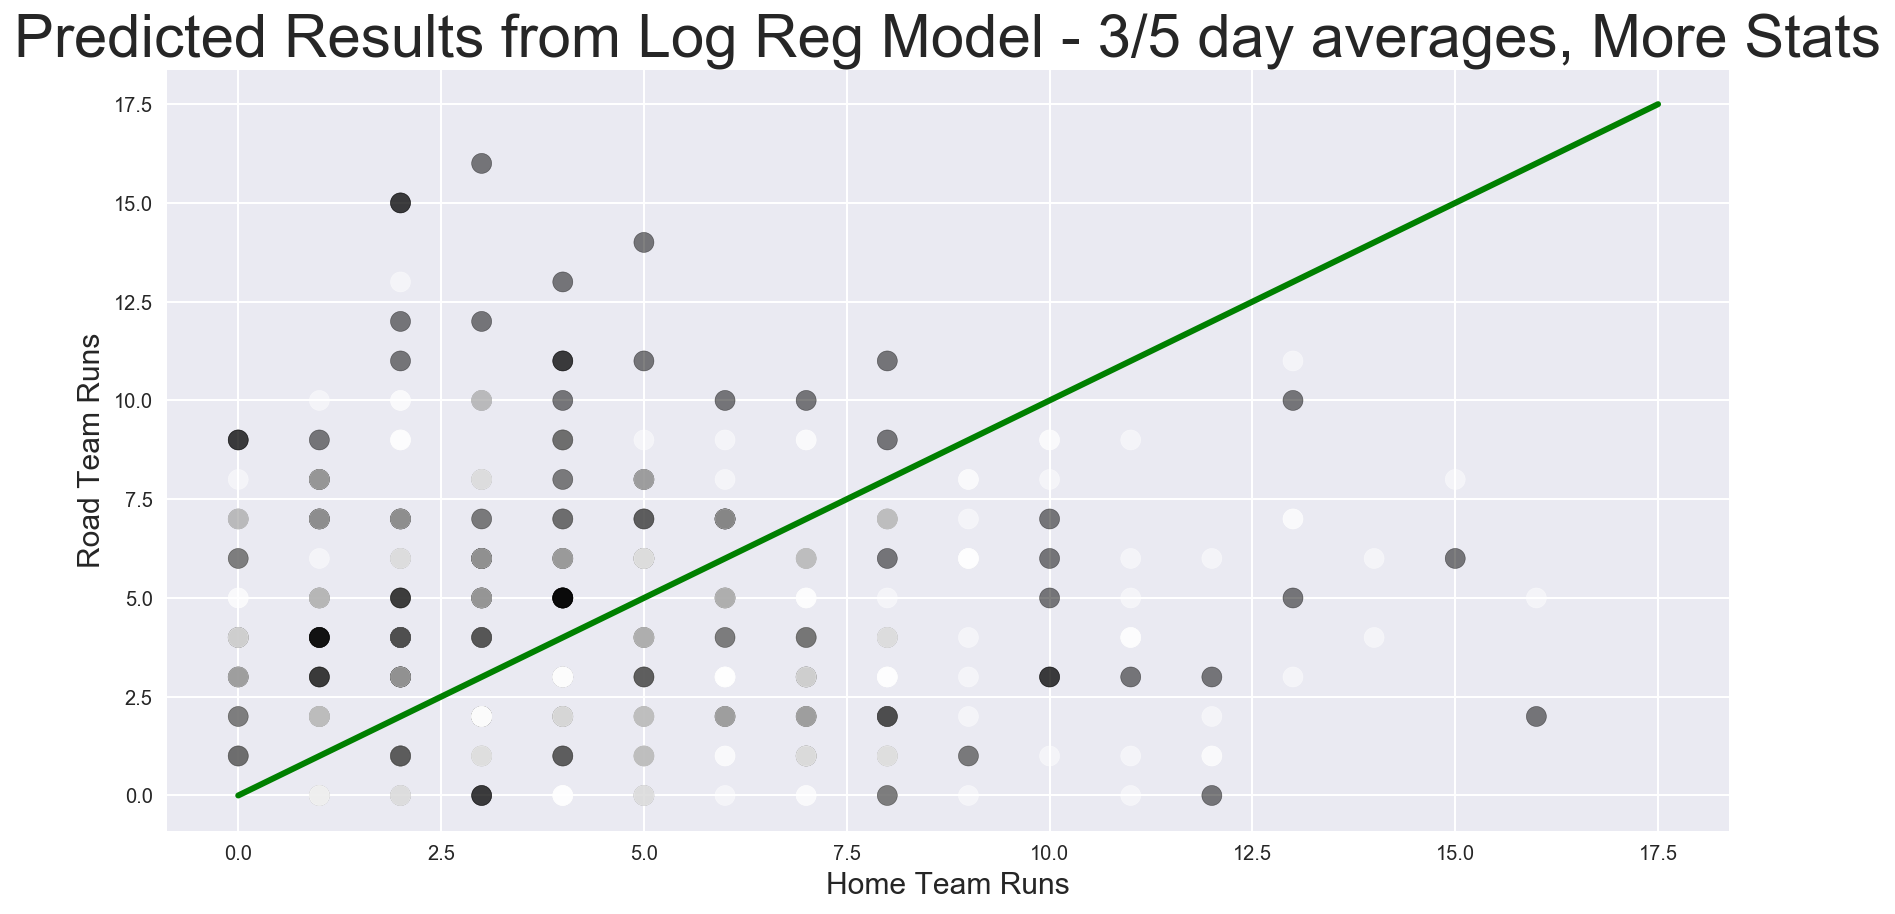

In [14]:
# Create sample database for graphical representation of results:
columns=[]
colstats=[]
cols=[]
allcol=[]
df_model=df.copy()
colstats=['sc','h','hr','lob','pit','er','po','e','ab','sb','bb','k','pit','ier','dp','wpct']
cols1 = ['vh_'+c+'_'+str(3)+'_diff' for c in colstats]
cols2 = ['vh_'+c+'_'+str(5)+'_diff' for c in colstats]
cols = cols1 + cols2
allcol = cols + ['win_vis','v_sc','h_sc']
df_model=df_model[allcol]
df_model.dropna(inplace=True) 
df_sample=df_model.sample(n=470)
y = df_sample.win_vis.values
X = df_sample[cols]
Xs=StandardScaler().fit_transform(X)
lr = LogisticRegression()
lr.fit(Xs,y)
scores = cross_val_score(lr,Xs,y,cv=10)

print "Model: Logistic Regression"
print "Periods: 3 days and 5 days"
print "Cross-Validated Model Accuracy: "+str(scores.mean())+" (+/- "+str(scores.std())+")"
predicted=lr.predict(Xs)
accscore=lr.score(Xs,y)
print "Test Data Accuracy: "+str(accscore)
print confusion_matrix(y, predicted)
print "--------------------------------------------------------------------"

df_sample['predicted']=list(predicted)
x=df_sample.h_sc
y=df_sample.v_sc
c=df_sample.predicted
fig = plt.figure(figsize=(14,7))
ax = fig.gca()
ax.scatter(x=x,y=y,s=100,c=c,cmap=plt.cm.binary,alpha=0.5)
plt.plot([0,17.5],[0,17.5], 'g-', lw=3)
ax.set_xlabel('Home Team Runs',fontsize=15)
ax.set_ylabel('Road Team Runs',fontsize=15)
ax.set_title('Predicted Results from Log Reg Model - 3/5 day averages, More Stats', fontsize=30)
plt.show()

In [8]:
# MODEL #6: RANDOM FOREST, will try 3,5,8,13,21 trees, 2 date ranges and pull feature importances as well.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix


d_dl1=[]
d_dl2=[]
d_sm=[]
d_ss=[]
d_as=[]
d_cm1=[]
d_cm2=[]
d_cm3=[]
d_cm4=[]
for trees in [3,5,8,13,21]:
    for daysloop1 in [3,5,8,13,21,34]:
        for daysloop2 in [3,5,8,13,21,34]:
            if daysloop1 < daysloop2:
                d_dl1.append(daysloop1)
                d_dl2.append(daysloop2)
                columns=[]
                cols1=[]
                cols2=[]
                cols=[]
                allcol=[]
                df_model=df.copy()
                colstats=['sc','h','hr','lob','pit','er','po','e','ab','sb','bb','k','pit','ier','dp','wpct']
                cols1 = ['vh_'+c+'_'+str(daysloop1)+'_diff' for c in colstats]
                cols2 = ['vh_'+c+'_'+str(daysloop2)+'_diff' for c in colstats]
                cols = cols1 + cols2
                allcol = cols + ['win_vis']
                df_model=df_model[allcol]
                df_model.dropna(inplace=True)       
                y = df_model.win_vis.values
                X = df_model[cols]
                Xs=StandardScaler().fit_transform(X)
                X_train, X_test, y_train, y_test = train_test_split(Xs,y, train_size=.8)
                rfc = RandomForestClassifier(n_estimators=trees, max_depth=5,n_jobs=-1)
                rfc.fit(X_train,y_train)
                scores = cross_val_score(rfc,X_train,y_train,cv=10)
                score_mean = scores.mean()
                score_std = scores.std()
                print "Model: Random Forest Classifier with "+str(trees)+" trees"
                print "Period: "+str(daysloop1)+" and "+str(daysloop2)+" days"
                print "Cross-Validated Model Accuracy: "+str(scores.mean())+" (+/- "+str(scores.std())+")"
                predicted=rfc.predict(X_test)
                accscore=rfc.score(X_test,y_test)
                print "Test Data Accuracy: "+str(accscore)
                print confusion_matrix(y_test, predicted)
                print "Feature Importances"
                fe_im=pd.DataFrame(rfc.feature_importances_,index=X.columns,columns=['importance'])
                print fe_im.sort_values(by='importance', ascending=False).head(10)
                print "--------------------------------------------------------------------"
                d_sm.append(score_mean)
                d_ss.append(score_std)
                d_as.append(accscore)
                d_cm1.append(confusion_matrix(y_test, predicted)[0][0])
                d_cm2.append(confusion_matrix(y_test, predicted)[0][1])
                d_cm3.append(confusion_matrix(y_test, predicted)[1][0])
                d_cm4.append(confusion_matrix(y_test, predicted)[1][1])  
            else:
                pass

Model: Random Forest Classifier with 3 trees
Period: 3 and 5 days
Cross-Validated Model Accuracy: 0.537373737374 (+/- 0.03888606686)
Test Data Accuracy: 0.487234042553
[[160  78]
 [163  69]]
Feature Importances
                importance
vh_h_3_diff       0.083644
vh_sc_3_diff      0.071509
vh_ier_3_diff     0.067306
vh_sc_5_diff      0.061334
vh_bb_3_diff      0.052353
vh_bb_5_diff      0.049979
vh_wpct_5_diff    0.044216
vh_sb_5_diff      0.042808
vh_po_3_diff      0.036132
vh_pit_5_diff     0.035286
--------------------------------------------------------------------
Model: Random Forest Classifier with 3 trees
Period: 3 and 8 days
Cross-Validated Model Accuracy: 0.523631166805 (+/- 0.0188197243185)
Test Data Accuracy: 0.51409978308
[[158  95]
 [129  79]]
Feature Importances
               importance
vh_k_8_diff      0.085727
vh_h_8_diff      0.080900
vh_sb_8_diff     0.076607
vh_bb_3_diff     0.069091
vh_ier_8_diff    0.057478
vh_pit_8_diff    0.054659
vh_e_3_diff      0.049804
vh_

In [16]:
db_results=pd.DataFrame(columns=['Days1','Days2','CV Acc','CV Acc Std','Test Acc','HW,HP','hw,vp','vw,hp','VW,VP'])
db_results['Days1']=d_dl1
db_results['Days2']=d_dl2
db_results['CV Acc']=d_sm
db_results['CV Acc Std']=d_ss
db_results['Test Acc']=d_as
db_results['HW,HP']=d_cm1
db_results['hw,vp']=d_cm2
db_results['vw,hp']=d_cm3
db_results['VW,VP']=d_cm4
db_results

,Days1,Days2,CV Acc,CV Acc Std,Test Acc,"HW,HP","hw,vp","vw,hp","VW,VP"
0,3,5,0.526132,0.026024,0.527660,146,107,115,102
1,3,8,0.530697,0.023678,0.490239,129,120,115,97
2,3,13,0.514874,0.029054,0.506726,140,102,118,86
3,3,21,0.530900,0.029832,0.486936,121,110,106,84
4,3,34,0.531407,0.017974,0.552356,130,91,80,81
5,5,8,0.515443,0.030335,0.522777,145,118,102,96
6,5,13,0.533420,0.027111,0.486547,131,105,124,86
7,5,21,0.527286,0.035047,0.484561,128,103,114,76
8,5,34,0.518331,0.035207,0.494764,116,86,107,73
9,8,13,0.515969,0.039358,0.524664,148,104,108,86


In [26]:
# MODEL #7: LOGISTIC REGRESSION (going to use feature importance knowledge to make search over 4 different date ranges
#           but with limited data points - only those showing up as meaningful feature importances

from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

for daysloop1 in [3,5,8,13,21,34]:
    for daysloop2 in [3,5,8,13,21,34]:
        for daysloop3 in [3,5,8,13,21,34]:
            for daysloop4 in [3,5,8,13,21,34]:
                if daysloop1 < daysloop2 < daysloop3 < daysloop4:
                    columns=[]
                    cols1=[]
                    cols2=[]
                    cols3=[]
                    cols4=[]
                    cols=[]
                    df_model=df.copy()
                    colstats=['lob','bb','k']
                    cols1 = ['vh_'+c+'_'+str(daysloop1)+'_diff' for c in colstats]
                    cols2 = ['vh_'+c+'_'+str(daysloop2)+'_diff' for c in colstats]
                    cols3 = ['vh_'+c+'_'+str(daysloop3)+'_diff' for c in colstats]
                    cols4 = ['vh_'+c+'_'+str(daysloop4)+'_diff' for c in colstats]
                    cols = cols1 + cols2 + cols3 + cols4
                    allcol = cols + ['win_vis']
                    df_model=df_model[allcol]
                    df_model.dropna(inplace=True)       
                    y = df_model.win_vis.values
                    X = df_model[cols]
                    Xs=StandardScaler().fit_transform(X)
                    X_train, X_test, y_train, y_test = train_test_split(Xs,y, train_size=.8)
                    lr = LogisticRegression()
                    lr.fit(X_train,y_train)
                    scores = cross_val_score(lr,X_train,y_train,cv=10)
                    print "Model: Logistic Regression"
                    print "Period: "+str(daysloop1)+" and "+str(daysloop2)+" and "+str(daysloop3)+" and "+str(daysloop4)+" days"
                    print "Cross-Validated Model Accuracy: "+str(scores.mean())+" (+/- "+str(scores.std())+")"
                    predicted=lr.predict(X_test)
                    accscore=lr.score(X_test,y_test)
                    print "Test Data Accuracy: "+str(accscore)
                    print confusion_matrix(y_test, predicted)
                    print "--------------------------------------------------------------------"
                else:
                    pass

Model: Logistic Regression
Period: 3 and 5 and 8 and 13 days
Cross-Validated Model Accuracy: 0.529486730735 (+/- 0.0179603214191)
Test Data Accuracy: 0.504484304933
[[179  63]
 [158  46]]
--------------------------------------------------------------------
Model: Logistic Regression
Period: 3 and 5 and 8 and 21 days
Cross-Validated Model Accuracy: 0.508227332318 (+/- 0.0460539598363)
Test Data Accuracy: 0.558194774347
[[183  60]
 [126  52]]
--------------------------------------------------------------------
Model: Logistic Regression
Period: 3 and 5 and 8 and 34 days
Cross-Validated Model Accuracy: 0.523521314427 (+/- 0.0297709633196)
Test Data Accuracy: 0.568062827225
[[172  37]
 [128  45]]
--------------------------------------------------------------------
Model: Logistic Regression
Period: 3 and 5 and 13 and 21 days
Cross-Validated Model Accuracy: 0.539803921569 (+/- 0.0324392273399)
Test Data Accuracy: 0.50593824228
[[178  40]
 [168  35]]
-----------------------------------------

In [27]:
# MODEL #8: RANDOM FOREST, will try 4 date ranges and only the three data points that had highest feature importances
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

for trees in [3,5,8,13,21]:
    for daysloop1 in [3,5,8,13,21,34]:
        for daysloop2 in [3,5,8,13,21,34]:
            for daysloop3 in [3,5,8,13,21,34]:
                for daysloop4 in [3,5,8,13,21,34]:
                    if daysloop1 < daysloop2 < daysloop3 < daysloop4:
                        columns=[]
                        cols1=[]
                        cols2=[]
                        cols3=[]
                        cols4=[]
                        cols=[]
                        allcol=[]
                        df_model=df.copy()
                        colstats=['lob','bb','k','po','ab']
                        cols1 = ['vh_'+c+'_'+str(daysloop1)+'_diff' for c in colstats]
                        cols2 = ['vh_'+c+'_'+str(daysloop2)+'_diff' for c in colstats]
                        cols3 = ['vh_'+c+'_'+str(daysloop3)+'_diff' for c in colstats]
                        cols4 = ['vh_'+c+'_'+str(daysloop4)+'_diff' for c in colstats]
                        cols = cols1 + cols2 + cols3 + cols4
                        allcol = cols + ['win_vis']
                        df_model=df_model[allcol]
                        df_model.dropna(inplace=True)       
                        y = df_model.win_vis.values
                        X = df_model[cols]
                        Xs=StandardScaler().fit_transform(X)
                        X_train, X_test, y_train, y_test = train_test_split(Xs,y, train_size=.8)
                        rfc = RandomForestClassifier(n_estimators=trees, n_jobs=-1)
                        rfc.fit(X_train,y_train)
                        scores = cross_val_score(lr,X_train,y_train,cv=10)
                        print "Model: Random Forest Classifier with "+str(trees)+" trees"
                        print "Period: "+str(daysloop1)+" and "+str(daysloop2)+" and "+str(daysloop3)+" and "+str(daysloop4)+" days"
                        print "Cross-Validated Model Accuracy: "+str(scores.mean())+" (+/- "+str(scores.std())+")"
                        predicted=rfc.predict(X_test)
                        accscore=rfc.score(X_test,y_test)
                        accscore2=accuracy_score(y_test,predicted)
                        print "Test Data Accuracy: "+str(accscore)
                        print "Test Data Accuracy: "+str(accscore2)
                        print confusion_matrix(y_test, predicted)
                        print "Feature Importances"
                        fe_im=pd.DataFrame(rfc.feature_importances_,index=X.columns,columns=['importance'])
                        print fe_im.sort_values(by='importance', ascending=False).head(10)
                        print "--------------------------------------------------------------------"
                    else:
                        pass

Model: Random Forest Classifier with 3 trees
Period: 3 and 5 and 8 and 13 days
Cross-Validated Model Accuracy: 0.514346509151 (+/- 0.0245576916409)
Test Data Accuracy: 0.533632286996
Test Data Accuracy: 0.533632286996
[[142  93]
 [115  96]]
Feature Importances
                importance
vh_ab_8_diff      0.059654
vh_ab_13_diff     0.059585
vh_lob_5_diff     0.059355
vh_k_5_diff       0.059090
vh_lob_8_diff     0.057359
vh_k_3_diff       0.055572
vh_po_13_diff     0.055001
vh_ab_3_diff      0.054205
vh_k_13_diff      0.053833
vh_lob_13_diff    0.053535
--------------------------------------------------------------------
Model: Random Forest Classifier with 3 trees
Period: 3 and 5 and 8 and 21 days
Cross-Validated Model Accuracy: 0.51421854094 (+/- 0.0282481221308)
Test Data Accuracy: 0.49406175772
Test Data Accuracy: 0.49406175772
[[110 101]
 [112  98]]
Feature Importances
                importance
vh_lob_21_diff    0.066482
vh_k_21_diff      0.062766
vh_ab_21_diff     0.061051
vh_k_8_

In [9]:
# MODEL #9: SUPPORT VECTOR CLASSIFICATION

from sklearn.metrics import classification_report
from sklearn.svm import SVC

for daysloop1 in [3,5,8]:
    for daysloop2 in [3,5,8]:
        if daysloop1 < daysloop2:
            columns=[]
            cols1=[]
            cols2=[]
            cols=[]
            df_model=df.copy()
            colstats=['sc','h','hr','lob','pit','er','po','e','ab','sb','bb','k','pit','ier','dp','wpct']
            cols1 = ['vh_'+c+'_'+str(daysloop1)+'_diff' for c in colstats]
            cols2 = ['vh_'+c+'_'+str(daysloop2)+'_diff' for c in colstats]
            cols = cols1 + cols2
            allcol = cols + ['win_vis']
            df_model=df_model[allcol]
            df_model.dropna(inplace=True)       
            y = df_model.win_vis.values
            X = df_model[cols]
            Xs=StandardScaler().fit_transform(X)
            X_train, X_test, y_train, y_test = train_test_split(Xs,y, train_size=.8)
            for c in [1,10,100]:
                for g in [0.1, 0.05, 0.01]:
                    clf = SVC(C=c,gamma=g, kernel='rbf')
                    clf.fit(X_train, y_train)  
                    print "Support Vector Classifier"
                    print "Kernel: Radial Basis Function"
                    print "Period: "+str(daysloop1)+" and "+str(daysloop2)
                    print "gamma ="+str(g)
                    print "C ="+str(c)
                    print "Score: "
                    print clf.score(X_test, y_test)
                    print "Classification Report:"
                    print classification_report(y_test,clf.predict(X_test))
                    print confusion_matrix(y_test, clf.predict(X_test))
                    print "--------------------------------------------------------------------"
            for c in [1,10,100]:
                clf = SVC(C=c,gamma=g, kernel='linear')
                clf.fit(X_train, y_train)  
                print "Support Vector Classifier"
                print "Linear"
                print "Period: "+str(daysloop1)+" and "+str(daysloop2)
                print "C ="+str(c)
                print "Score: "
                print clf.score(X_test, y_test)
                print "Classification Report:"
                print classification_report(y_test,clf.predict(X_test))
                print confusion_matrix(y_test, clf.predict(X_test))
                print "--------------------------------------------------------------------"
        else:
            pass

Support Vector Classifier
Kernel: Radial Basis Function
Period: 3 and 5
gamma =0.1
C =1
Score: 
0.546808510638
Classification Report:
             precision    recall  f1-score   support

          0       0.54      0.73      0.62       241
          1       0.55      0.35      0.43       229

avg / total       0.55      0.55      0.53       470

[[176  65]
 [148  81]]
--------------------------------------------------------------------
Support Vector Classifier
Kernel: Radial Basis Function
Period: 3 and 5
gamma =0.05
C =1
Score: 
0.525531914894
Classification Report:
             precision    recall  f1-score   support

          0       0.53      0.69      0.60       241
          1       0.52      0.35      0.42       229

avg / total       0.52      0.53      0.51       470

[[167  74]
 [149  80]]
--------------------------------------------------------------------
Support Vector Classifier
Kernel: Radial Basis Function
Period: 3 and 5
gamma =0.01
C =1
Score: 
0.523404255319
Class

/Users/jonvanwieren/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Support Vector Classifier
Linear
Period: 3 and 8
C =10
Score: 
0.492407809111
Classification Report:
             precision    recall  f1-score   support

          0       0.49      1.00      0.66       227
          1       0.00      0.00      0.00       234

avg / total       0.24      0.49      0.32       461

[[227   0]
 [234   0]]
--------------------------------------------------------------------
Support Vector Classifier
Linear
Period: 3 and 8
C =100
Score: 
0.492407809111
Classification Report:
             precision    recall  f1-score   support

          0       0.49      1.00      0.66       227
          1       0.00      0.00      0.00       234

avg / total       0.24      0.49      0.32       461

[[227   0]
 [234   0]]
--------------------------------------------------------------------
Support Vector Classifier
Kernel: Radial Basis Function
Period: 5 and 8
gamma =0.1
C =1
Score: 
0.540130151844
Classification Report:
             precision    recall  f1-score   supp

In [11]:
dflist=[]
for index, row in df.iterrows():
    newnumber = row['v_wpct'] - row['h_wpct']
    dflist.append(newnumber)
df['vh_wpct_diff'] = dflist

In [12]:
df.head()

,date,dh,day,vis,v_lg,v_g,home,h_lg,h_g,v_sc,h_sc,outs,d/n,park,att,len,v_sbi,h_sbi,v_ab,v_h,v_2b,v_3b,v_hr,v_rbi,v_sh,v_sf,v_hbp,v_bb,v_ibb,v_k,v_sb,v_cs,v_hdp,v_ci,v_lob,v_pit,v_ier,v_er,v_wp,v_bk,v_po,v_a,v_e,v_pb,v_dp,v_tp,h_ab,h_h,h_2b,h_3b,h_hr,h_rbi,h_sh,h_sf,h_hbp,h_bb,h_ibb,h_k,h_sb,h_cs,h_hdp,h_ci,h_lob,h_pit,h_ier,h_er,h_wp,h_bk,h_po,h_a,h_e,h_pb,h_dp,h_tp,win_team,win_horv,v_cumw,v_cuml,h_cumw,h_cuml,v_wpct,h_wpct,v_testw,v_testl,h_testw,h_testl,v_testwpct,h_testwpct,win_vis,v_sc_3_avg,h_sc_3_avg,vh_sc_3_diff,v_sc_5_avg,h_sc_5_avg,vh_sc_5_diff,v_sc_8_avg,h_sc_8_avg,vh_sc_8_diff,v_sc_13_avg,h_sc_13_avg,vh_sc_13_diff,v_sc_21_avg,h_sc_21_avg,vh_sc_21_diff,v_sc_34_avg,h_sc_34_avg,vh_sc_34_diff,v_h_3_avg,h_h_3_avg,vh_h_3_diff,v_h_5_avg,h_h_5_avg,vh_h_5_diff,v_h_8_avg,h_h_8_avg,vh_h_8_diff,v_h_13_avg,h_h_13_avg,vh_h_13_diff,v_h_21_avg,h_h_21_avg,vh_h_21_diff,v_h_34_avg,h_h_34_avg,vh_h_34_diff,v_hr_3_avg,h_hr_3_avg,vh_hr_3_diff,v_hr_5_avg,h_hr_5_avg,vh_hr_5_diff,v_hr_8_avg,h_hr_8_avg,vh_hr_8_diff,v_hr_13_avg,h_hr_13_avg,vh_hr_13_diff,v_hr_21_avg,h_hr_21_avg,vh_hr_21_diff,v_hr_34_avg,h_hr_34_avg,vh_hr_34_diff,v_lob_3_avg,h_lob_3_avg,vh_lob_3_diff,v_lob_5_avg,h_lob_5_avg,vh_lob_5_diff,v_lob_8_avg,...,v_l_3,h_w_3,h_l_3,v_wpct_3,h_wpct_3,v_w_5,v_l_5,h_w_5,h_l_5,v_wpct_5,h_wpct_5,v_w_8,v_l_8,h_w_8,h_l_8,v_wpct_8,h_wpct_8,v_w_13,v_l_13,h_w_13,h_l_13,v_wpct_13,h_wpct_13,v_w_21,v_l_21,h_w_21,h_l_21,v_wpct_21,h_wpct_21,v_w_34,v_l_34,h_w_34,h_l_34,v_wpct_34,h_wpct_34,vh_wpct_3_diff,vh_wpct_5_diff,vh_wpct_8_diff,vh_wpct_13_diff,vh_wpct_21_diff,vh_wpct_34_diff,v_ab_3_avg,h_ab_3_avg,vh_ab_3_diff,v_ab_5_avg,h_ab_5_avg,vh_ab_5_diff,v_ab_8_avg,h_ab_8_avg,vh_ab_8_diff,v_ab_13_avg,h_ab_13_avg,vh_ab_13_diff,v_ab_21_avg,h_ab_21_avg,vh_ab_21_diff,v_ab_34_avg,h_ab_34_avg,vh_ab_34_diff,v_sb_3_avg,h_sb_3_avg,vh_sb_3_diff,v_sb_5_avg,h_sb_5_avg,vh_sb_5_diff,v_sb_8_avg,h_sb_8_avg,vh_sb_8_diff,v_sb_13_avg,h_sb_13_avg,vh_sb_13_diff,v_sb_21_avg,h_sb_21_avg,vh_sb_21_diff,v_sb_34_avg,h_sb_34_avg,vh_sb_34_diff,v_bb_3_avg,h_bb_3_avg,vh_bb_3_diff,v_bb_5_avg,h_bb_5_avg,vh_bb_5_diff,v_bb_8_avg,h_bb_8_avg,vh_bb_8_diff,v_bb_13_avg,h_bb_13_avg,vh_bb_13_diff,v_bb_21_avg,h_bb_21_avg,vh_bb_21_diff,v_bb_34_avg,h_bb_34_avg,vh_bb_34_diff,v_k_3_avg,h_k_3_avg,vh_k_3_diff,v_k_5_avg,h_k_5_avg,vh_k_5_diff,v_k_8_avg,h_k_8_avg,vh_k_8_diff,v_k_13_avg,h_k_13_avg,vh_k_13_diff,v_k_21_avg,h_k_21_avg,vh_k_21_diff,v_k_34_avg,h_k_34_avg,vh_k_34_diff,v_ier_3_avg,h_ier_3_avg,vh_ier_3_diff,v_ier_5_avg,h_ier_5_avg,vh_ier_5_diff,v_ier_8_avg,h_ier_8_avg,vh_ier_8_diff,v_ier_13_avg,h_ier_13_avg,vh_ier_13_diff,v_ier_21_avg,h_ier_21_avg,vh_ier_21_diff,v_ier_34_avg,h_ier_34_avg,vh_ier_34_diff,v_dp_3_avg,h_dp_3_avg,vh_dp_3_diff,v_dp_5_avg,h_dp_5_avg,vh_dp_5_diff,v_dp_8_avg,h_dp_8_avg,vh_dp_8_diff,v_dp_13_avg,h_dp_13_avg,vh_dp_13_diff,v_dp_21_avg,h_dp_21_avg,vh_dp_21_diff,v_dp_34_avg,h_dp_34_avg,vh_dp_34_diff,vh_wpct_diff
0,2016-04-03,0,Sun,NYN,NL,1,KCA,AL,1,3,4,51,N,KAN06,40030,193,000000030,10010200x,33,7,1,0,0,3,0,0,0,6,0,9,0,1,0,0,9,3,3,3,0,0,24,15,1,1,3,0,30,9,0,0,0,4,0,1,0,2,0,3,1,0,3,0,5,5,3,3,0,0,27,13,0,0,0,0,KCA,home,0,0,0,0,NaN,NaN,0,0,0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,NaN,NaN,0,0,0,0,NaN,NaN,0,0,0,0,NaN,NaN,0,0,0,0,NaN,NaN,0,0,0,0,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-04-03,0,Sun,TOR,AL,1,TBA,AL,1,5,3,54,D,ST

In [108]:
# Save data in csv file 
df.to_csv('./df_csv.csv', index=False, encoding='utf-8')

In [3]:
# Load data from csv file
df = pd.read_csv('df_csv.csv')

/Users/jonvanwieren/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
